In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [9]:
ddos_data = pd.read_csv('ddos_dataset.csv', low_memory=False)

operational_df = ddos_data.copy()
operational_df[' Timestamp'] = pd.to_datetime(operational_df[' Timestamp'])
mask_malicious = operational_df['label'] != 'benign'
operational_df

Unnamed: 0                                 Flow ID     Source IP  \
0               0    172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5   
1               1    172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1   
2               2    172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5   
3               3    172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5   
4               4    172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5   
...           ...                                     ...           ...   
64234       65995  172.16.0.5-192.168.50.1-38625-63051-17    172.16.0.5   
64235       65996  172.16.0.5-192.168.50.1-58632-18963-17    172.16.0.5   
64236       65997  172.16.0.5-192.168.50.1-46104-64704-17    172.16.0.5   
64237       65998  172.16.0.5-192.168.50.1-60686-10440-17    172.16.0.5   
64238       65999   172.16.0.5-192.168.50.1-45602-1387-17    172.16.0.5   

        Source Port  Destination IP   Destination Port   Protocol  \
0               634    192.168.50.1              60495         17   
1               634      172.16.0.5              60495         17   
2               634    192.168.50.1              46391         17   
3               634    192.168.50.1              11894         17   
4               634    192.168.50.1              27878         17   
...             ...             ...                ...        ...   
64234         38625    192.168.50.1              63051         17   
64235         58632    192.168.50.1              18963         17   
64236         46104    192.168.50.1              64704         17   
64237         60686    192.168.50.1              10440         17   
64238         45602    192.168.50.1               1387         17   

                       Timestamp   Flow Duration   Total Fwd Packets  ...  \
0     2018-12-01 10:51:39.813448           28415                  97  ...   
1     2018-12-01 10:51:39.820842               2                   2  ...   
2     2018-12-01 10:51:39.852499           48549                 200  ...   
3     2018-12-01 10:51:39.890213           48337                 200  ...   
4     2018-12-01 10:51:39.941151           32026                 200  ...   
...                          ...             ...                 ...  ...   
64234 2018-12-01 13:04:46.628249               1                   2  ...   
64235 2018-12-01 13:04:46.628963          212238                   6  ...   
64236 2018-12-01 13:04:46.629014               1                   2  ...   
64237 2018-12-01 13:04:46.629016          108952                   4  ...   
64238 2018-12-01 13:04:46.629300               1                   2  ...   

        Active Std   Active Max   Active Min  Idle Mean   Idle Std   Idle Max  \
0              0.0          0.0          0.0        0.0        0.0        0.0   
1              0.0          0.0          0.0        0.0        0.0        0.0   
2              0.0          0.0          0.0        0.0        0.0        0.0   
3              0.0          0.0          0.0        0.0        0.0        0.0   
4              0.0          0.0          0.0        0.0        0.0        0.0   
...            ...          ...          ...        ...        ...        ...   
64234          0.0          0.0          0.0        0.0        0.0        0.0   
64235          0.0          0.0          0.0        0.0        0.0        0.0   
64236          0.0          0.0          0.0        0.0        0.0        0.0   
64237          0.0          0.0          0.0        0.0        0.0        0.0   
64238          0.0          0.0          0.0        0.0        0.0        0.0   

        Idle Min  SimillarHTTP   Inbound         label  
0            0.0             0         1      ddos_dns  
1            0.0             0         0      ddos_dns  
2            0.0             0         1      ddos_dns  
3            0.0             0         1      ddos_dns  
4            0.0             0         1      ddos_dns  
...          ...           ...       

In [10]:
operational_df[operational_df['SimillarHTTP'] != '0']['SimillarHTTP']

27                    detectportal.firefox.com/success.txt
106                                     ocsp.digicert.com/
431                                   205.174.165.72/c.php
463                                   205.174.165.72/c.php
479                                   205.174.165.72/c.php
                               ...                        
29627                          talebi.ca/category/network/
29631       talebi.ca/wp-content/uploads/2017/09/logo2.png
36155    en.drshno.com/wp-content/uploads/2015/12/sa2-1...
36546    en.drshno.com/wp-content/uploads/2015/12/sa1-1...
37821    en.drshno.com/wp-content/themes/enfold/config-...
Name: SimillarHTTP, Length: 478, dtype: object

Flows that use protocols similiar to HTTP are: ['benign' 'ddos_dns' 'ddos_mssql' 'ddos_ntp']


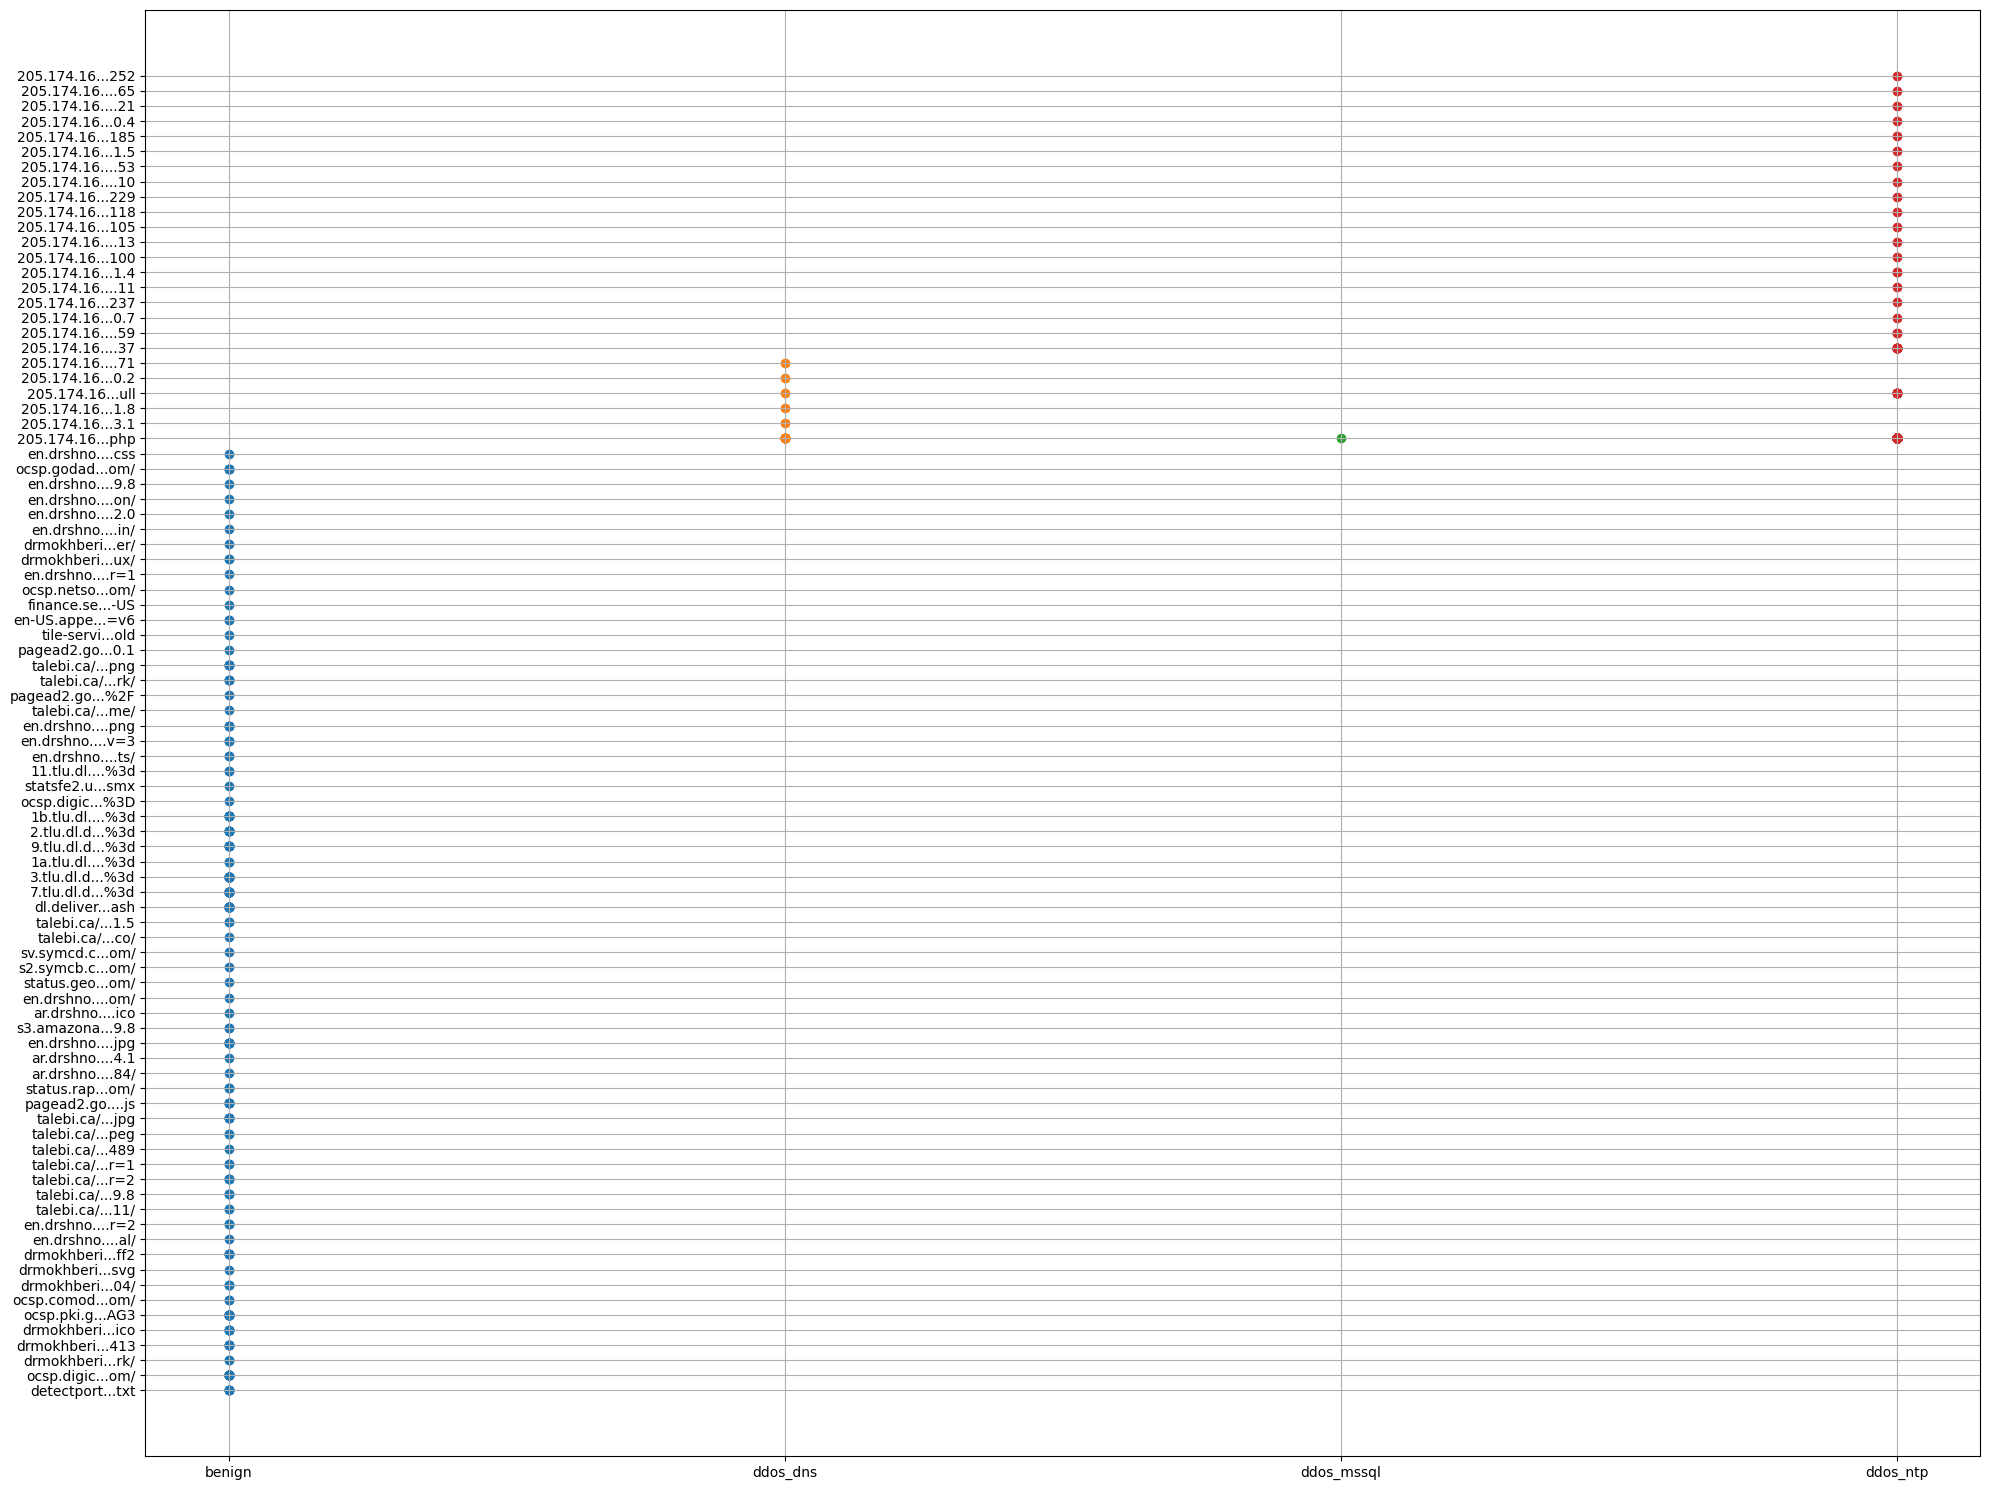

In [11]:
traffic = []
for row in operational_df[operational_df['SimillarHTTP'] != '0'].groupby(['label', 'SimillarHTTP']).count().index:
    traffic.append(row[0])

print(f'Flows that use protocols similiar to HTTP are: {np.unique(traffic)}')
df = operational_df[operational_df['SimillarHTTP'] != '0'].copy()
df['SimillarHTTP'] = df['SimillarHTTP'].apply(lambda x: x[:10] + '...' + x[-3:])
plt.figure(figsize=(20, 15))
for label in np.unique(df['label']):
    mask = df['label'] == label
    plt.scatter(data=df[mask], x='label', y='SimillarHTTP')
plt.tight_layout()
plt.grid()

The plot shows the fact that similiar HTTP protcols used by benign traffic flow and attacks are different. Furthermore, this plot shows that only the following kind of traffic use simillar http protocols: benign, ddos_dns, ddos_mssql, ddos_ntp 

Since the top IP destination has received a lot more packets in respect of the other, let's exclude it and analyze the other 4 for a clear representation of also the othre targeted IP

 Protocol
0        18
6     11857
17    46706
Name: Flow ID, dtype: int64


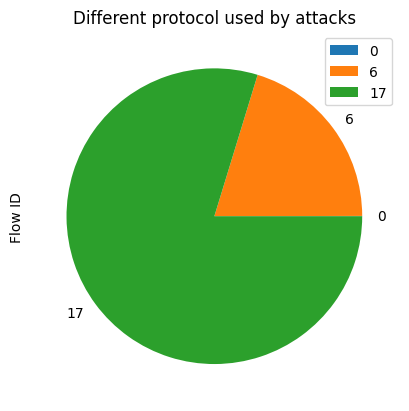

In [12]:
malicious_df = operational_df[mask_malicious].copy()
protocol_df = malicious_df.groupby(' Protocol').count()['Flow ID']
protocol_df.plot(kind='pie', title='Different protocol used by attacks')
plt.legend()
print(protocol_df)

Even if the protol 0 seems to be not used, it is indeed. This visualization is due to the fact that the count for each protocol is:<br>
0        18, <br>
6     11857, <br>
17    46706 <br>

Now it's time to analyze the kind of attack or data flow characterized by the SYN flag high in the TCP protocol

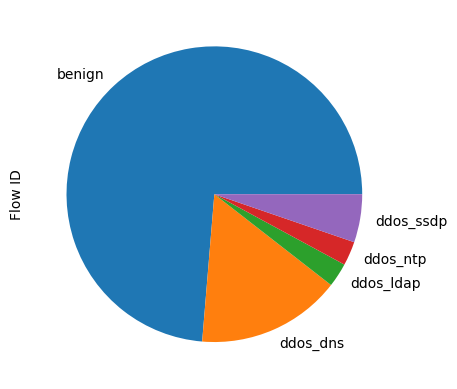

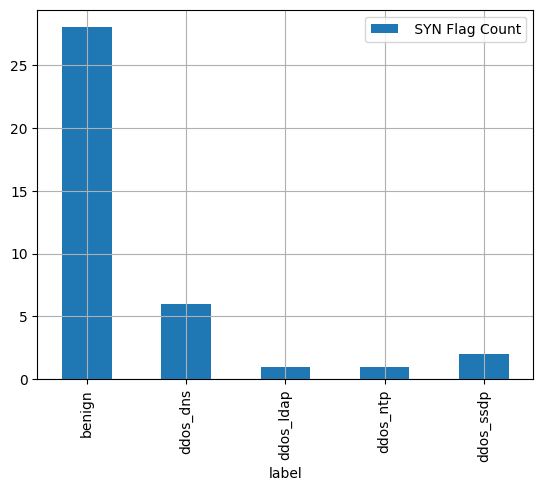

In [13]:
mask_SYN = operational_df[' SYN Flag Count'] != 0
SYN_df = operational_df[mask_SYN].groupby('label').count()['Flow ID']
SYN_df.plot(kind='pie')
at_SYN_df = operational_df[mask_SYN]
at_SYN_df[[' SYN Flag Count', 'label']].groupby('label').count().plot(kind='bar')
plt.grid()

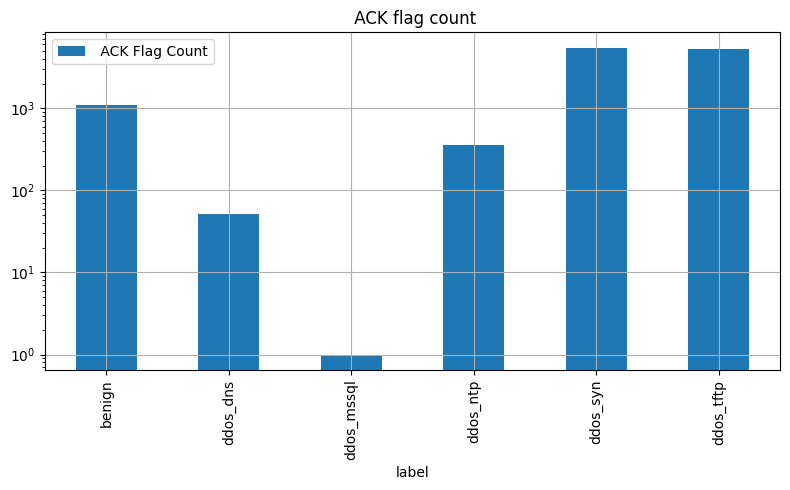

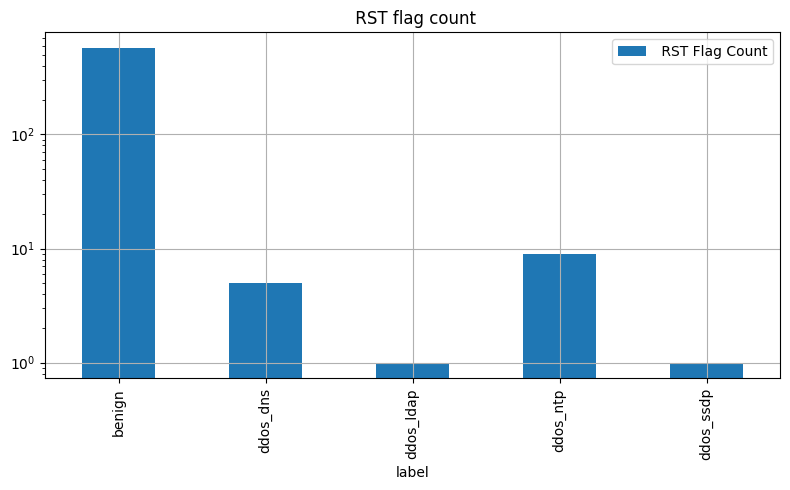

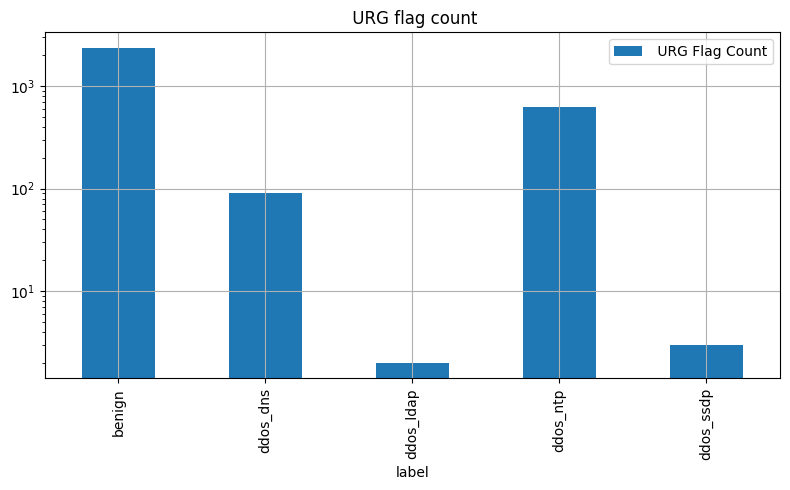

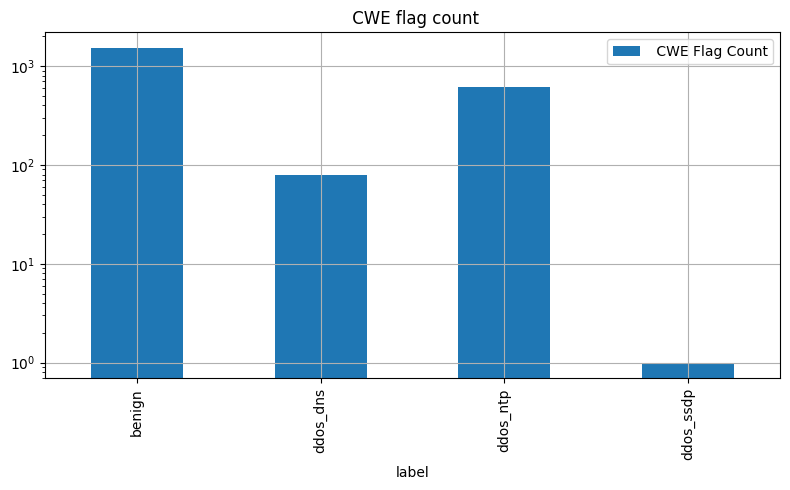

In [14]:
flags = [' ACK', ' RST', ' URG', ' CWE']
for flag in flags:
    fig, ax = plt.subplots(figsize=(8, 5))
    mask = operational_df[f'{flag} Flag Count'] != 0
    df = operational_df[mask]
    df[[f'{flag} Flag Count', 'label']].groupby('label').count().replace(0, 1).plot(kind='bar', ax=ax)
    plt.yscale('log')
    plt.title(f'{flag} flag count')
    plt.tight_layout()
    plt.grid()
plt.show()

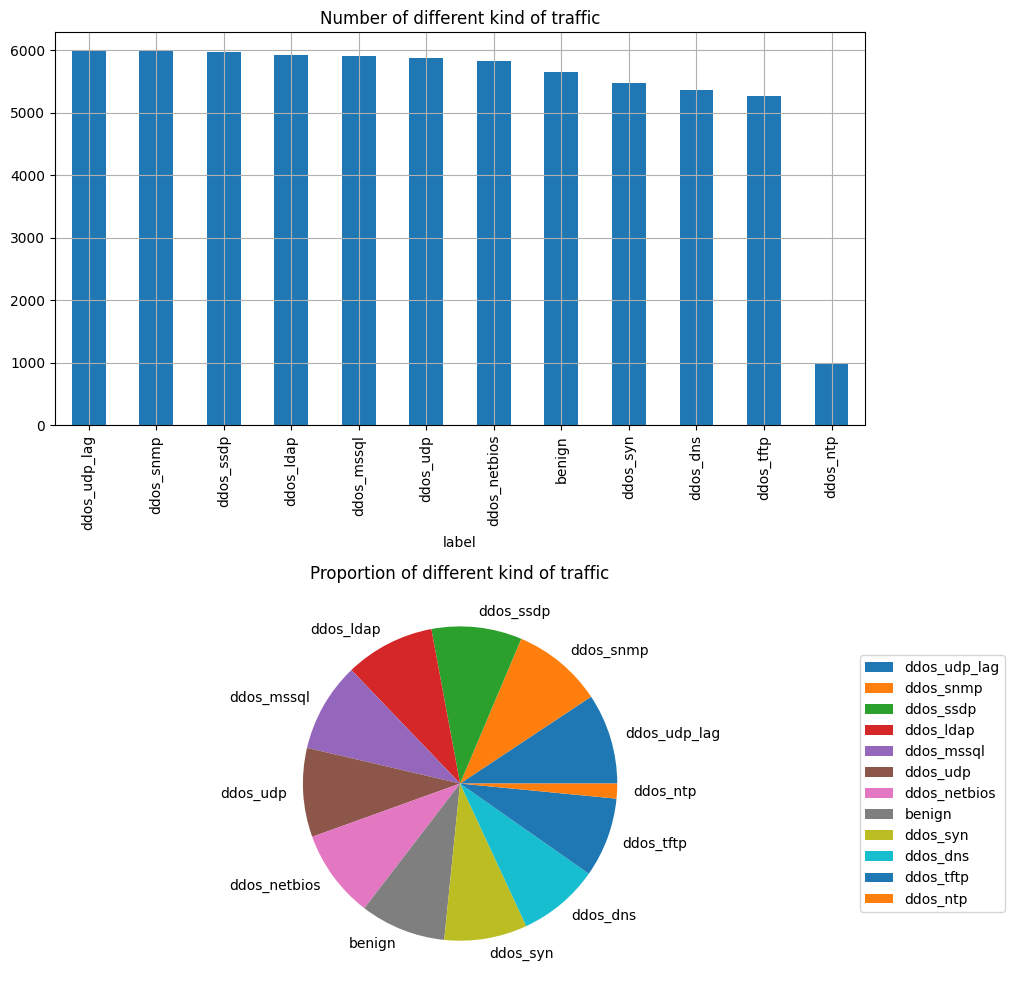

In [15]:
df_attacks = operational_df.groupby('label').count().sort_values(by='Flow ID', ascending=False)
attacks = df_attacks.index
fig, ax = plt.subplots(2,1)
df_attacks['Flow ID'].plot(kind='bar', title='Number of different kind of traffic', ax=ax[0], figsize=(10,2))
ax[0].grid()
df_attacks.plot(kind='pie', y='Flow ID', ax=ax[1], title='Proportion of different kind of traffic', figsize=(10,10))
ax[1].legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
ax[1].set_ylabel('')

plt.tight_layout()

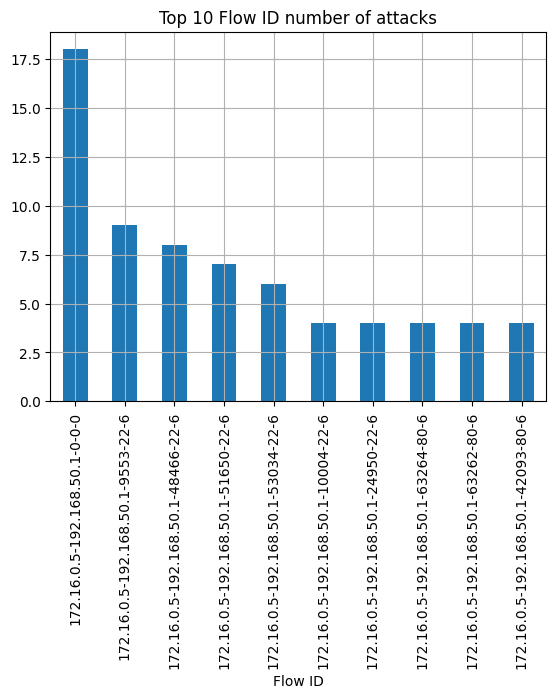

In [16]:
mask_bening = operational_df['label'] != 'benign'
df_flow_id = operational_df[mask_bening].groupby('Flow ID').count().sort_values(by=' Source IP', ascending=False)[:10]
df_flow_id[' Source IP'].plot(kind='bar', title='Top 10 Flow ID number of attacks')
plt.grid()

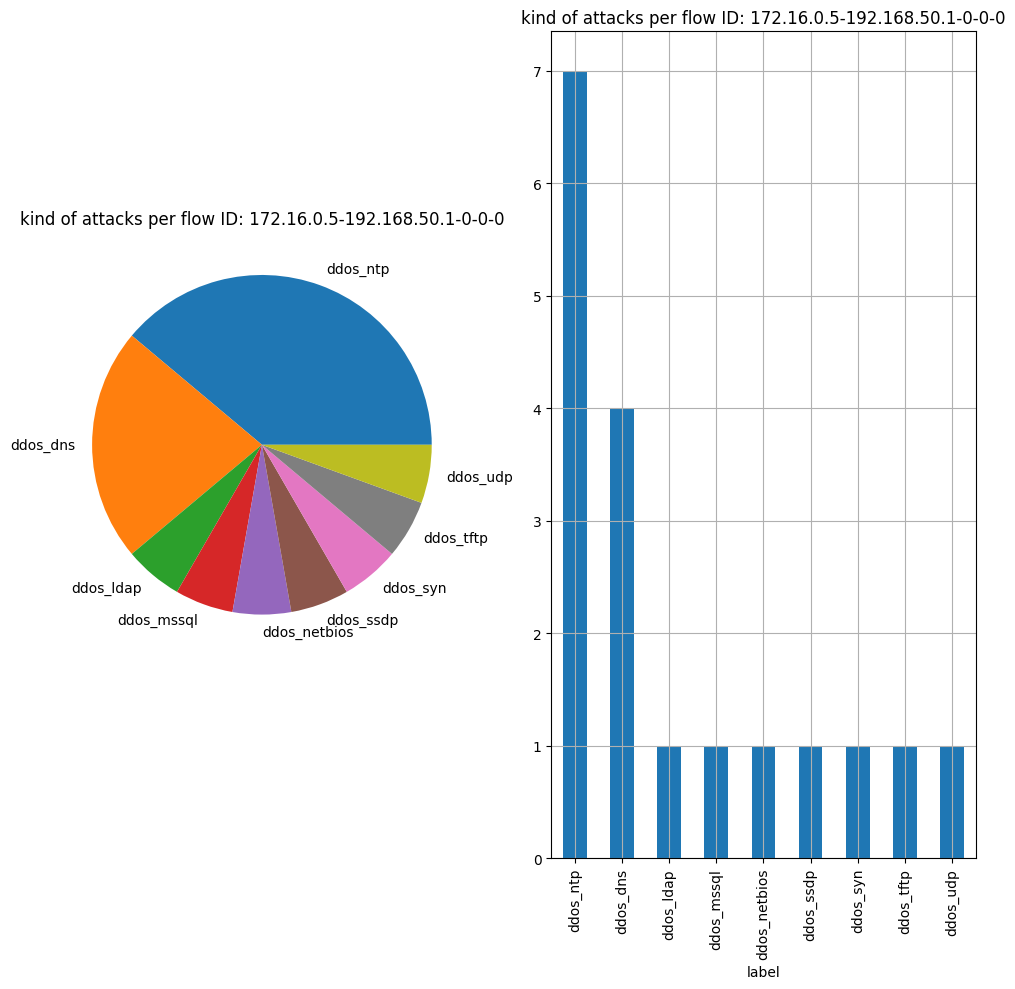

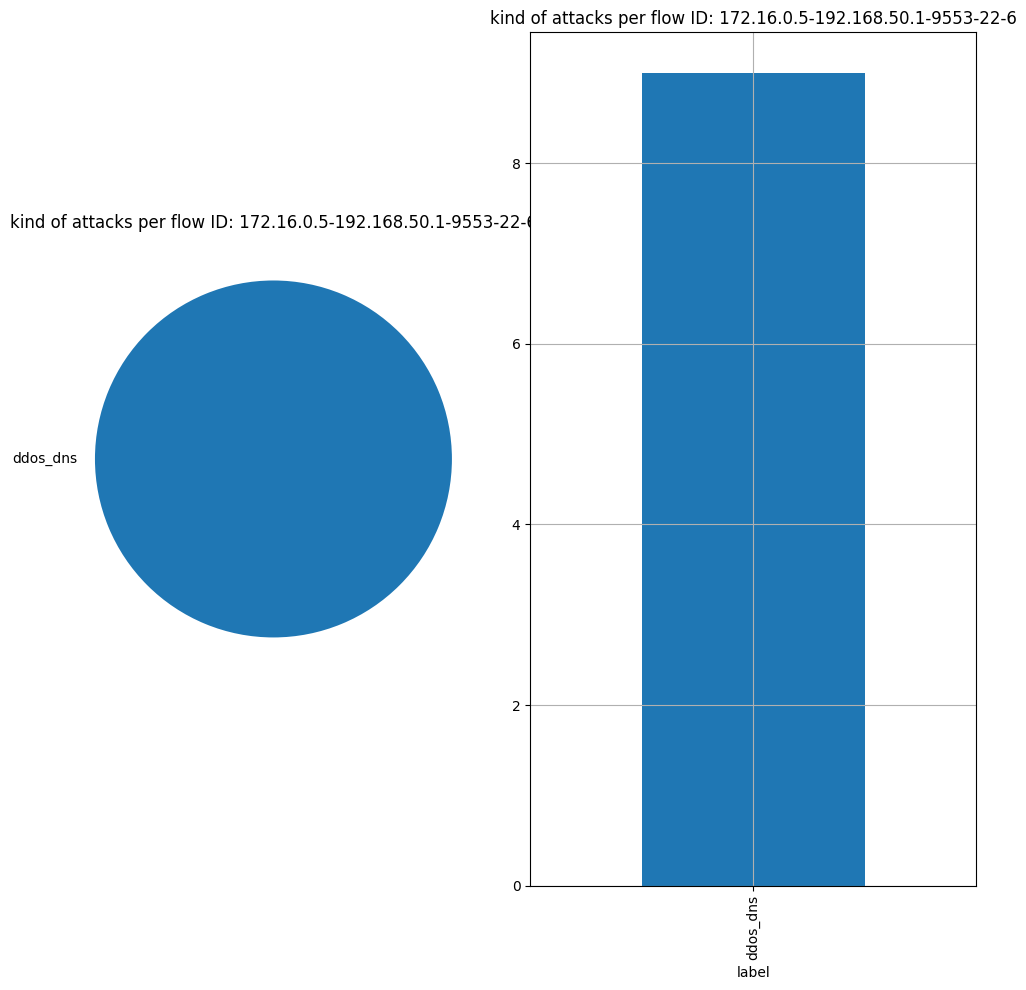

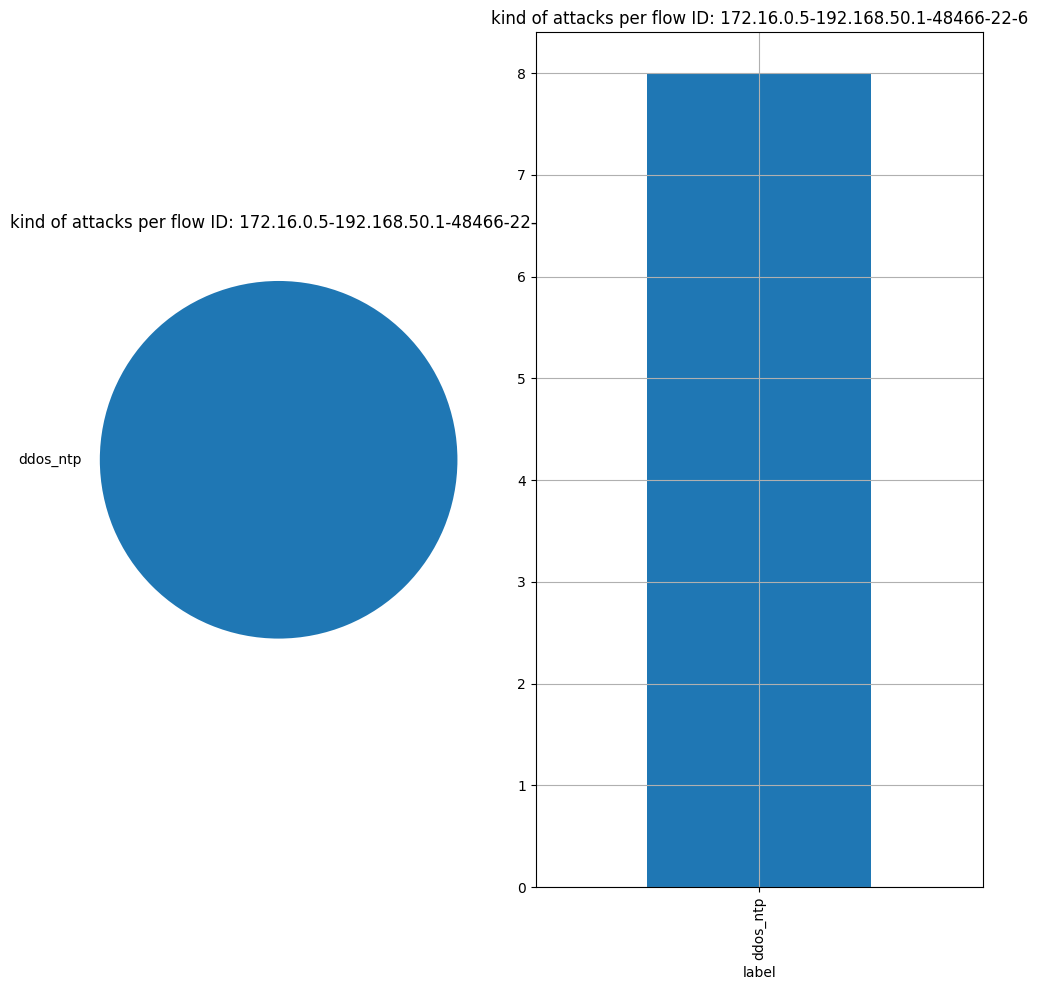

In [17]:
for i, index in enumerate(df_flow_id.index[:3]):
    fig, ax = plt.subplots(1,2, figsize=(10,10))
    mask_index = operational_df['Flow ID'] == index
    df_plot = operational_df[mask_index].groupby('label').count().sort_values(by='Flow ID', ascending=False)['Flow ID']
    df_plot.plot(kind='pie', title= f'kind of attacks per flow ID: {index}', ax=ax[0])
    ax[0].set_ylabel('')
    df_plot.plot(kind='bar', title= f'kind of attacks per flow ID: {index}', ax=ax[1])
    ax[1].grid()
    plt.tight_layout()

Analysis of the top 10 common link (Flow ID, Source Port, Destination Port) and the relative attack (the benign flow has been removed) based on the number of packets exchanged

Text(0.5, 1.0, 'Top 10 common link and relative attack count ')

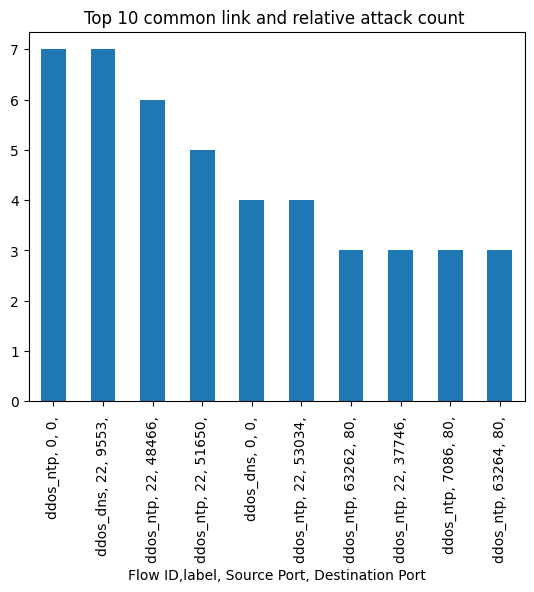

In [18]:
top_10_link = operational_df[operational_df['label'] != 'benign'].groupby(['Flow ID', 'label', ' Source Port', ' Destination Port']).count().sort_values(by=' Source IP', ascending=False)
top_10_link[' Source IP'][:10].plot(kind='bar')
index = np.array(top_10_link.index[:10])[:]
ticks = []
for value in index:
    string = ''
    for tick in value[1:]:
        string = string + str(tick) + ", "
    ticks.append(string)
plt.xticks([x for x in range(10)],ticks)
plt.title('Top 10 common link and relative attack count ')


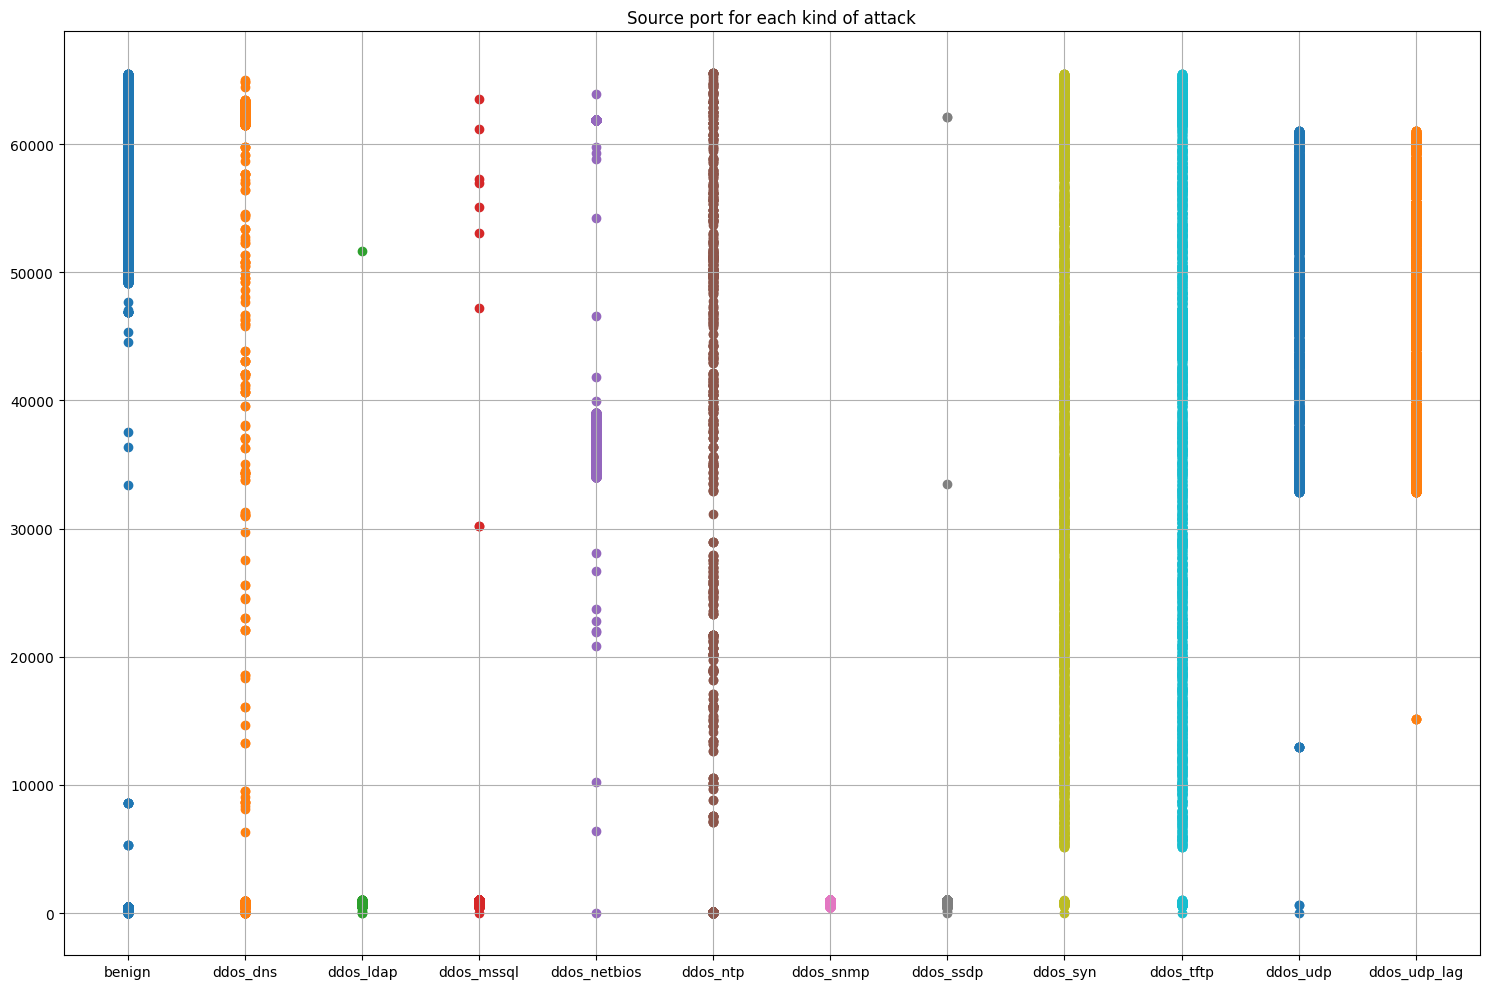

In [19]:
operational_df = ddos_data.copy()
operational_df[' Timestamp'] = pd.to_datetime(operational_df[' Timestamp'])
operational_df.set_index(' Timestamp', inplace=True)
df_result = operational_df
ax, figure = plt.subplots(figsize=(15,10))
labels =np.unique(df_result['label'])
for attack in labels:
    mask_at = df_result['label'] == attack
    plt.scatter(data=df_result[mask_at], x='label', y=' Source Port')
plt.title('Source port for each kind of attack')
plt.grid()
plt.tight_layout()
plt.show()
    

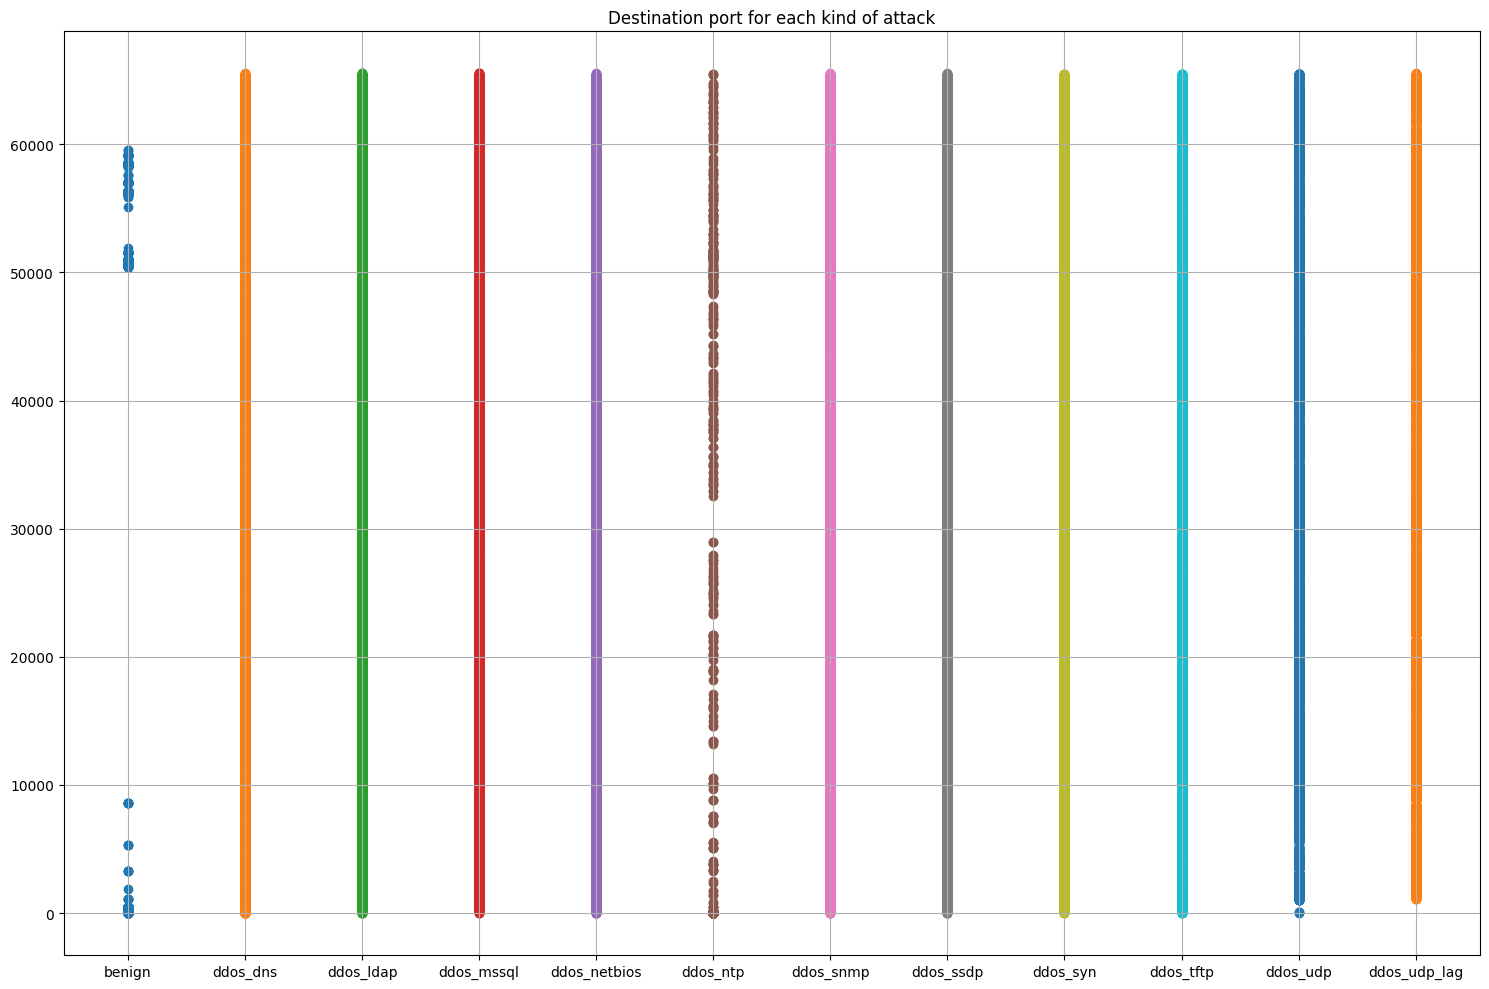

In [20]:
operational_df = ddos_data.copy()
operational_df[' Timestamp'] = pd.to_datetime(operational_df[' Timestamp'])
operational_df.set_index(' Timestamp', inplace=True)
df_result = operational_df
ax, figure = plt.subplots(figsize=(15,10))
labels = df_result.groupby('label').count().index
for attack in labels:
    mask_at = df_result['label'] == attack
    plt.scatter(data=df_result[mask_at], x='label', y=' Destination Port')
plt.title('Destination port for each kind of attack')
plt.grid()
plt.tight_layout()
plt.show()
    

Evauluating Packet length for each different kind of flow (attack or benign) 

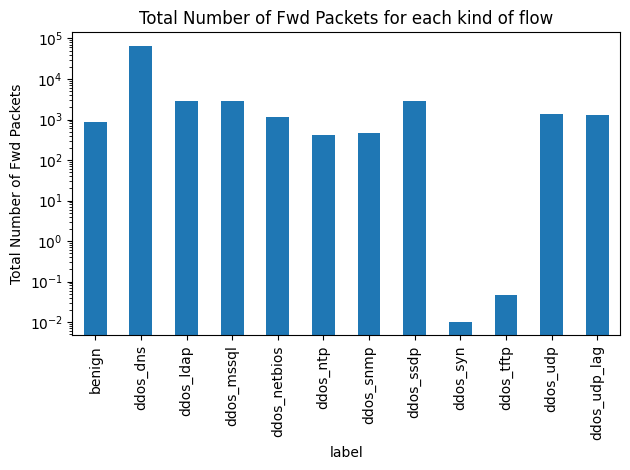

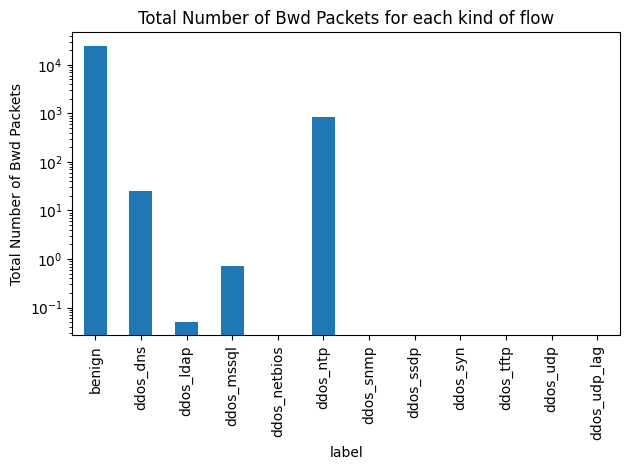

In [21]:
fig, ax = plt.subplots()
grouped_df = operational_df.groupby('label')
grouped_df['Total Length of Fwd Packets'].mean().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Total Number of Fwd Packets')
plt.title('Total Number of Fwd Packets for each kind of flow')
plt.tight_layout()

fig, ax = plt.subplots()
grouped_df[' Total Length of Bwd Packets'].mean().plot(kind='bar')
plt.yscale('log')
plt.ylabel('Total Number of Bwd Packets')
plt.title('Total Number of Bwd Packets for each kind of flow')
plt.tight_layout()
plt.show()


In [22]:
def convert_milliseconds_to_msm(milliseconds):
    minutes, remainder = divmod(milliseconds, 60000)
    seconds, milliseconds = divmod(remainder, 1000)
    return "{:02}m:{:02}s:{:02}ms".format(int(minutes), int(seconds), int(milliseconds))

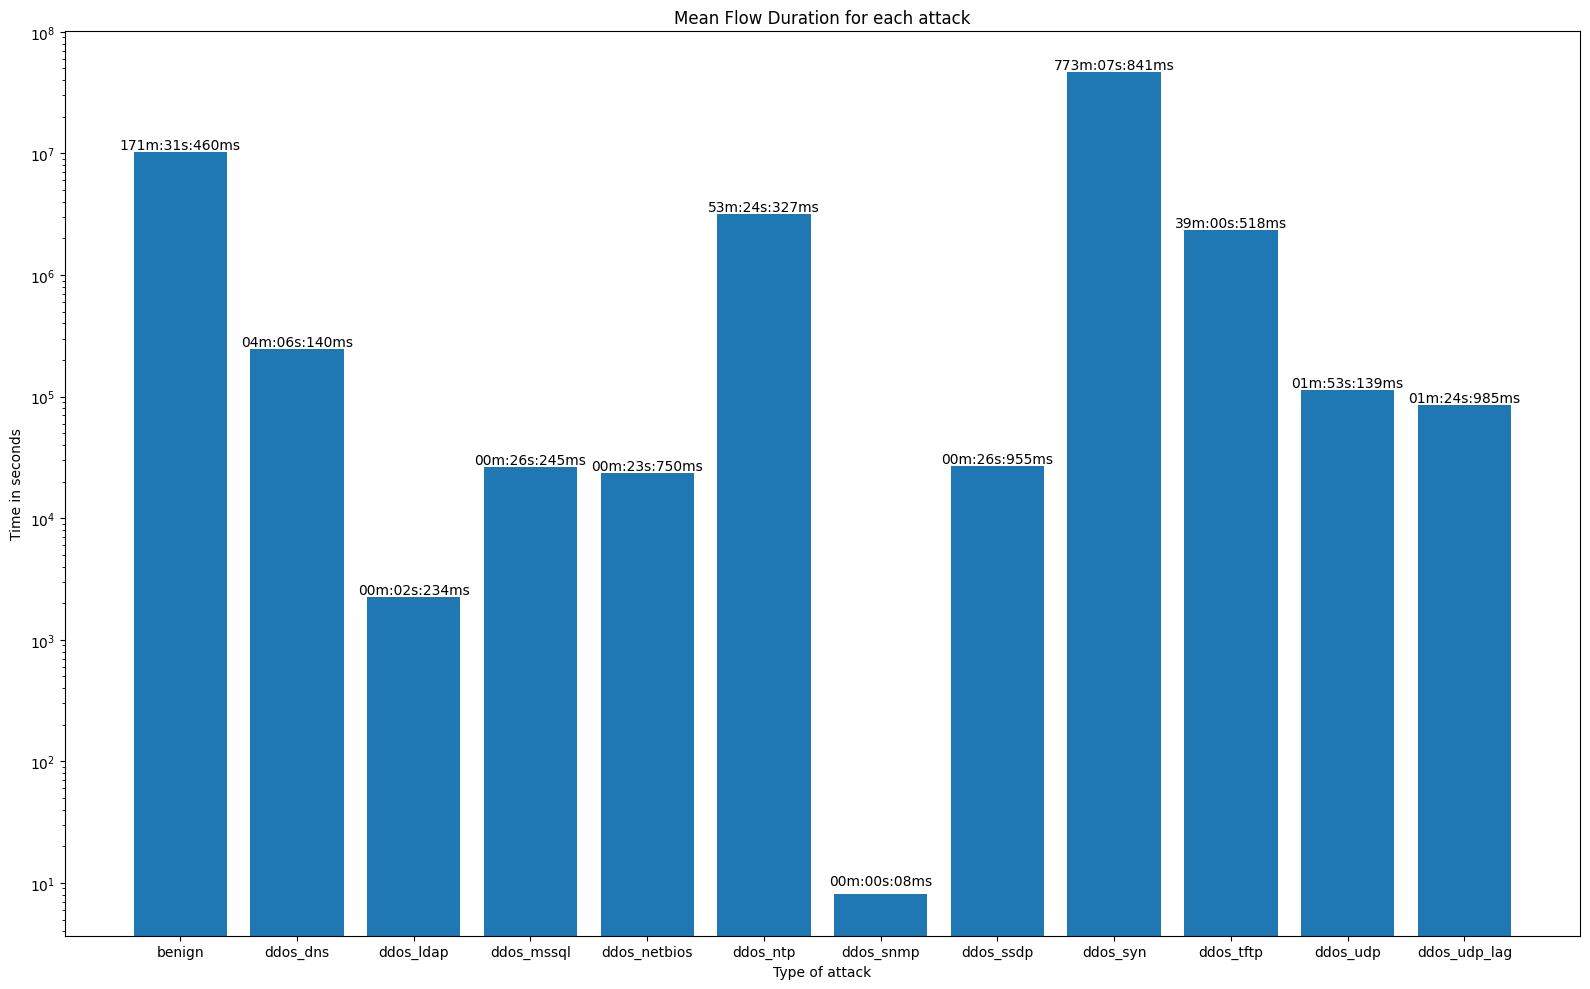

In [23]:
operational_df['M:S:MS Flow Duration'] = operational_df[' Flow Duration'].apply(convert_milliseconds_to_msm)
fig, ax = plt.subplots(figsize=(16, 10))
means = grouped_df[' Flow Duration'].mean()
plt.bar(means.index, means)

for i, value in enumerate(means):
    plt.text(i, value + 1, str(convert_milliseconds_to_msm(value)), ha='center', va='bottom')
plt.yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in seconds')
plt.title('Mean Flow Duration for each attack')
plt.tight_layout()
plt.show()

Idle Mean

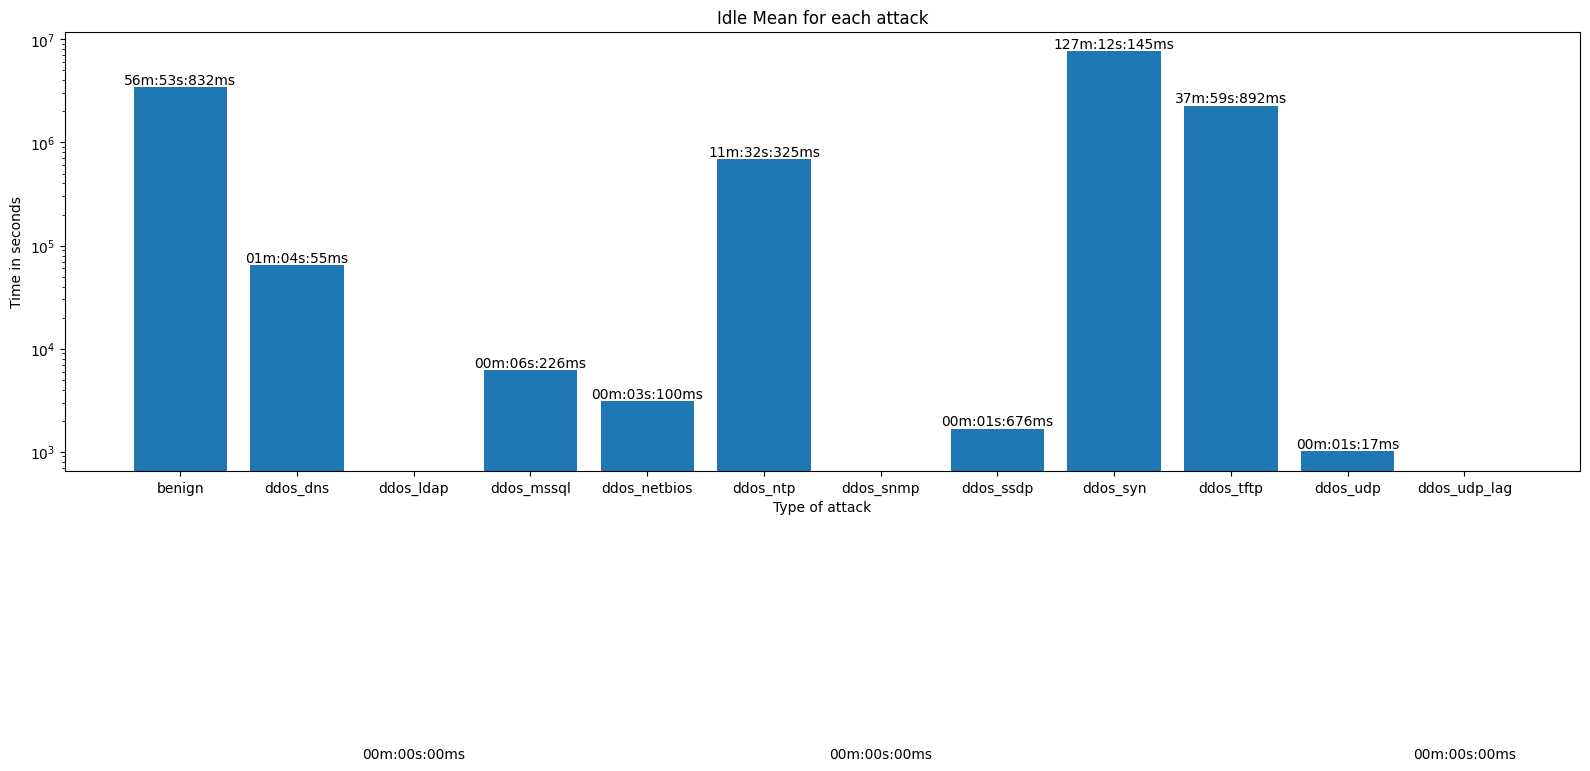

In [24]:
operational_df['M:S:MS Idle Mean'] = operational_df['Idle Mean'].apply(convert_milliseconds_to_msm)
fig, ax = plt.subplots(figsize=(16, 10))
means = grouped_df['Idle Mean'].mean()
plt.bar(means.index, means)

for i, value in enumerate(means):
    plt.text(i, value + 1, str(convert_milliseconds_to_msm(value)), ha='center', va='bottom')
plt.yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in seconds')
plt.title('Idle Mean for each attack')
plt.tight_layout()
plt.show()

Flow IAT Mean

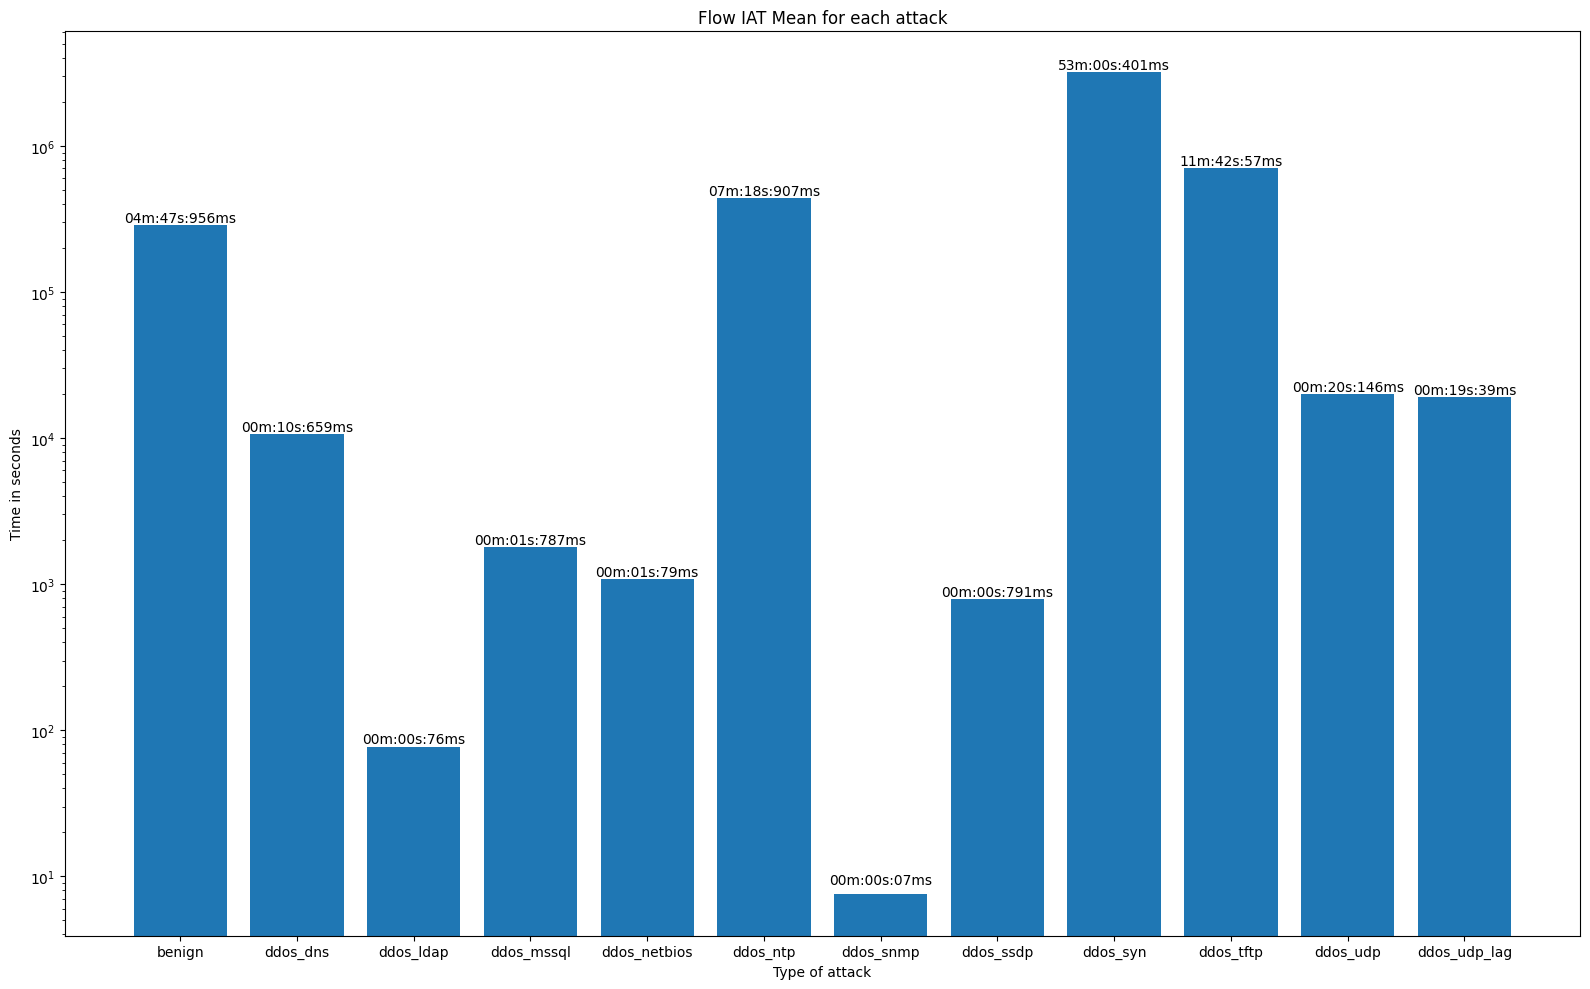

In [47]:
operational_df['M:S:MS Flow IAT Mean'] = operational_df[' Flow IAT Mean'].apply(convert_milliseconds_to_msm)
fig, ax = plt.subplots(figsize=(16, 10))
means = grouped_df[' Flow IAT Mean'].mean()
plt.bar(means.index, means)

for i, value in enumerate(means):
    plt.text(i, value + 1, str(convert_milliseconds_to_msm(value)), ha='center', va='bottom')
plt.yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in seconds')
plt.title('Flow IAT Mean for each attack')
plt.tight_layout()
plt.show()

Fwd IAT Mean

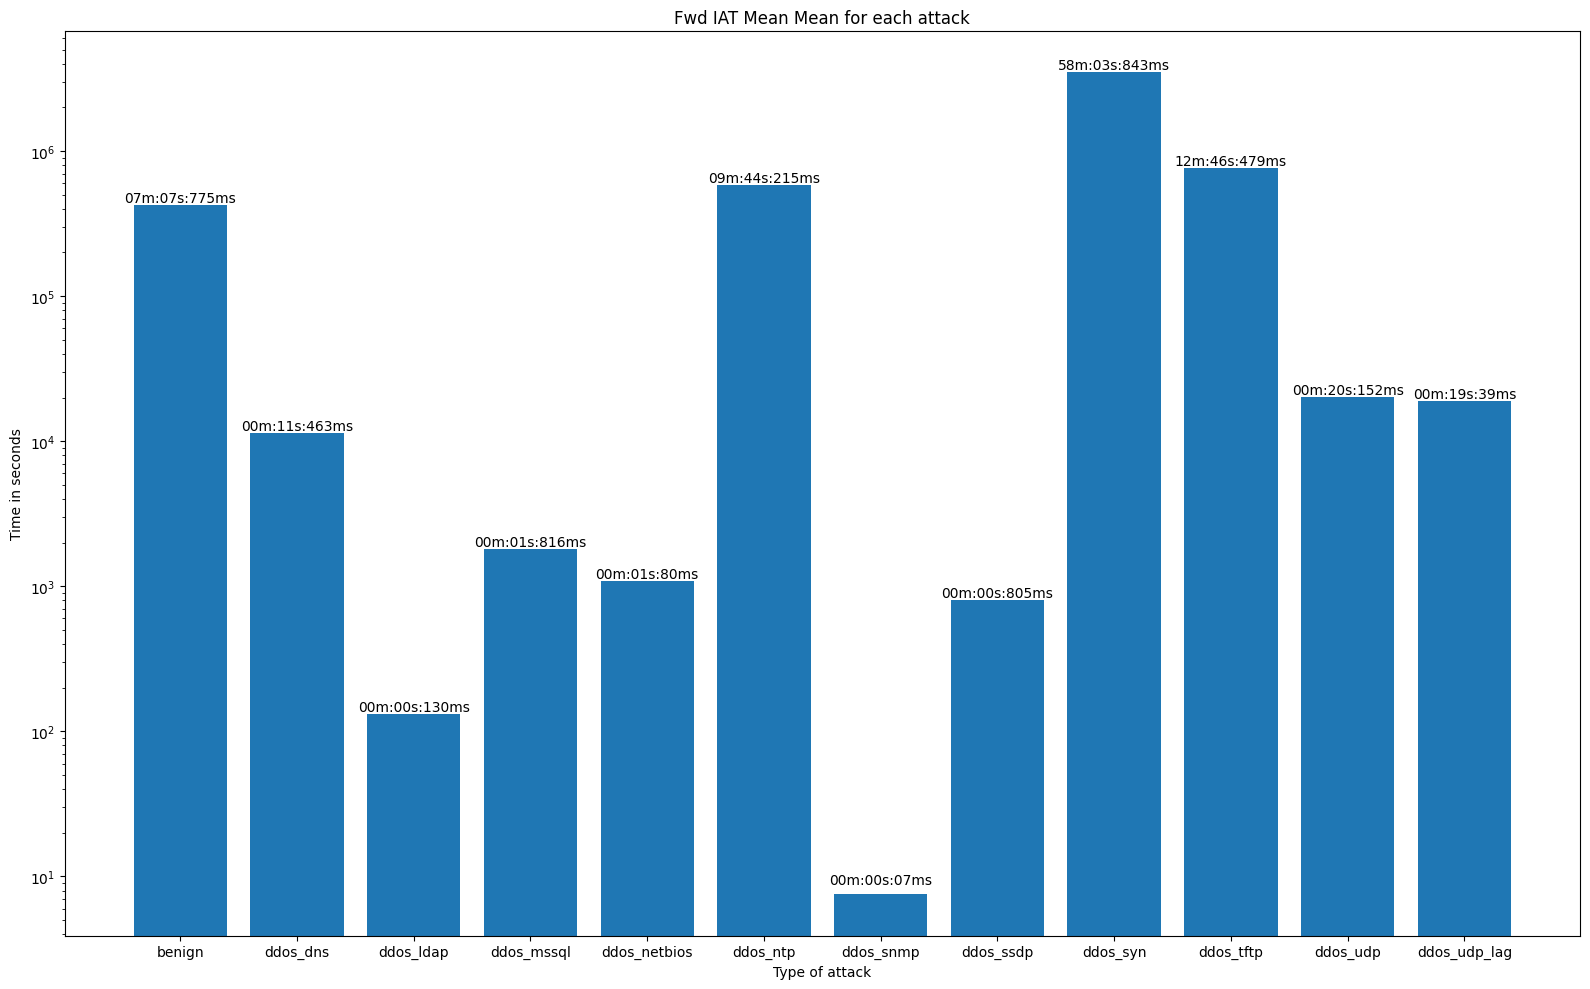

In [48]:
operational_df['M:S:MS Fwd IAT Mean'] = operational_df[' Fwd IAT Mean'].apply(convert_milliseconds_to_msm)
fig, ax = plt.subplots(figsize=(16, 10))
means = grouped_df[' Fwd IAT Mean'].mean()
plt.bar(means.index, means)

for i, value in enumerate(means):
    plt.text(i, value + 1, str(convert_milliseconds_to_msm(value)), ha='center', va='bottom')
plt.yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in seconds')
plt.title('Fwd IAT Mean for each attack')
plt.tight_layout()
plt.show()

Bwd IAT Mean

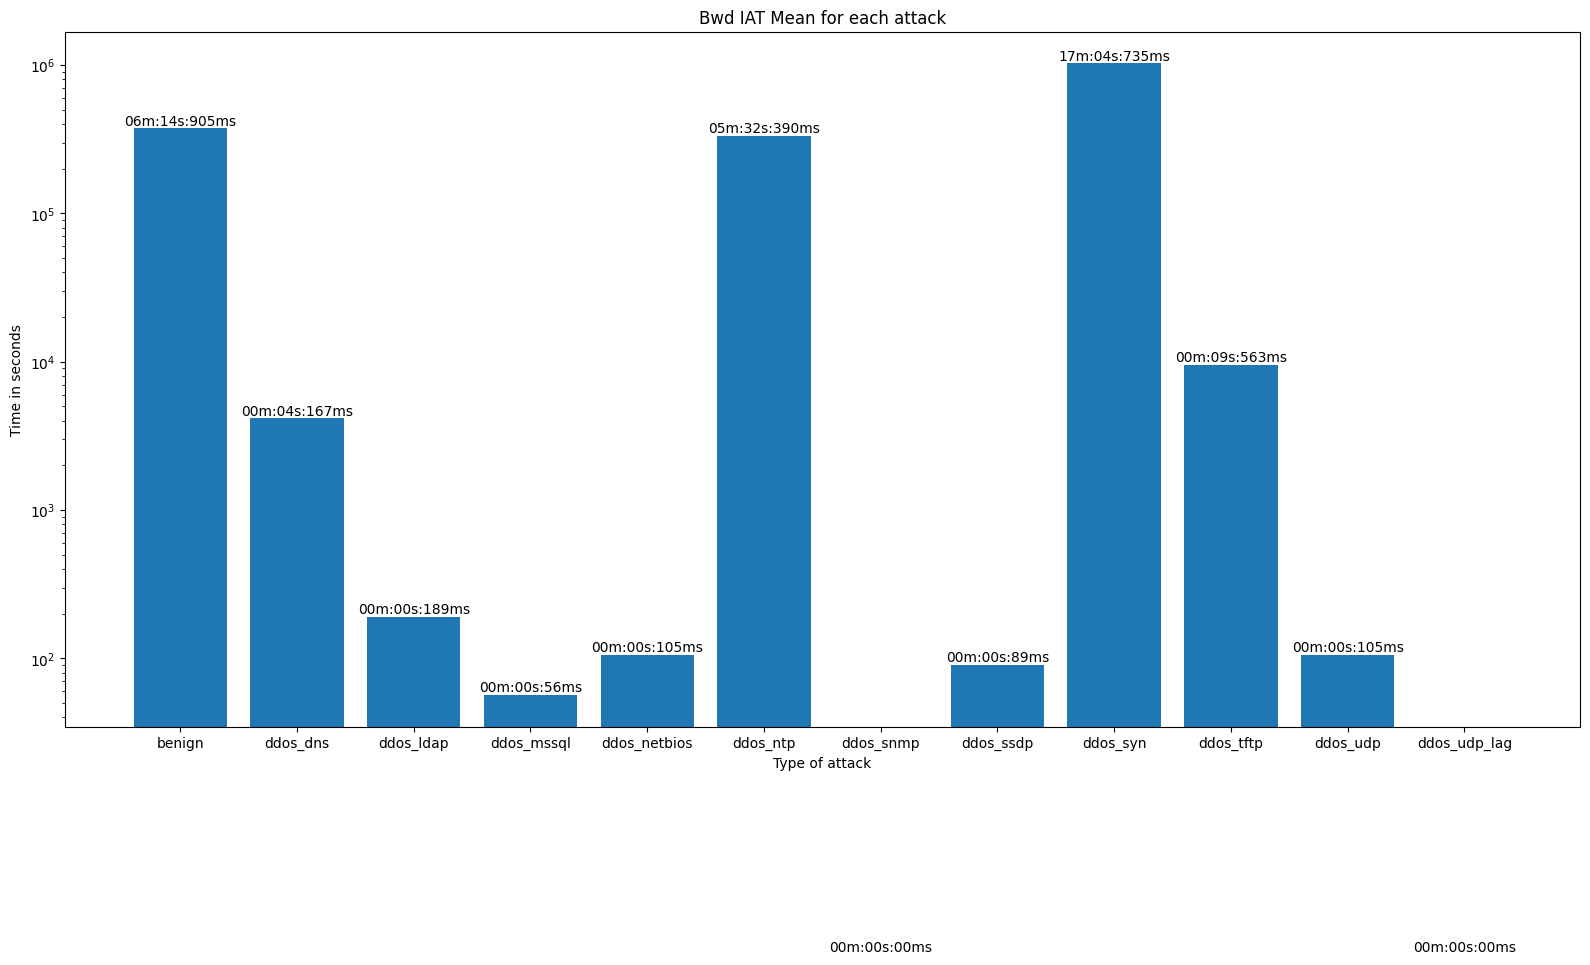

In [49]:
operational_df['M:S:MS Bwd IAT Mean'] = operational_df[' Bwd IAT Mean'].apply(convert_milliseconds_to_msm)
fig, ax = plt.subplots(figsize=(16, 10))
means = grouped_df[' Bwd IAT Mean'].mean()
plt.bar(means.index, means)

for i, value in enumerate(means):
    plt.text(i, value + 1, str(convert_milliseconds_to_msm(value)), ha='center', va='bottom')
plt.yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in seconds')
plt.title('Bwd IAT Mean for each attack')
plt.tight_layout()
plt.show()

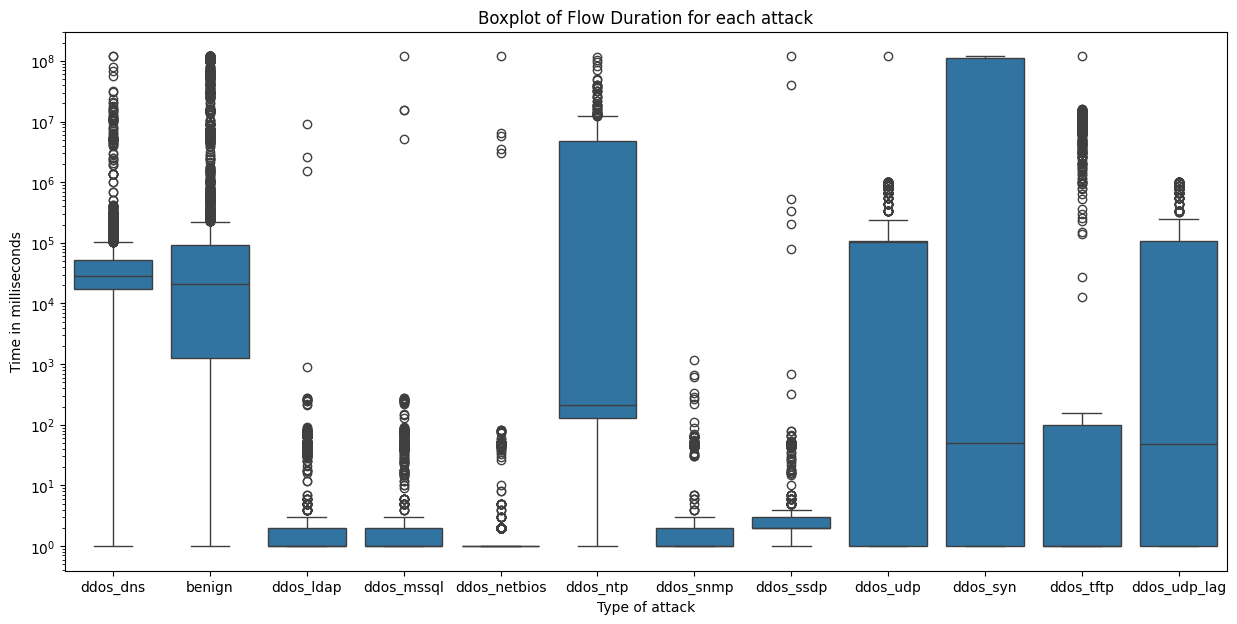

In [25]:
fig, ax= plt.subplots(figsize=(15, 7))

sns.boxplot(data=operational_df, x='label', y=' Flow Duration')
ax.set_yscale('log')
plt.xlabel('Type of attack')
plt.ylabel('Time in milliseconds')
plt.title('Boxplot of Flow Duration for each attack')
plt.show()

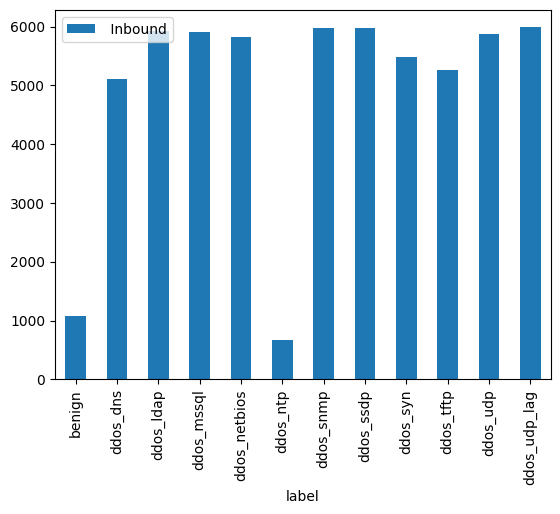

In [26]:
mask_inbound = operational_df[' Inbound'] != 0
at_inbound_df = operational_df[mask_inbound]
at_inbound_df[[' Inbound', 'label']].groupby('label').count().plot(kind='bar')
plt.show()

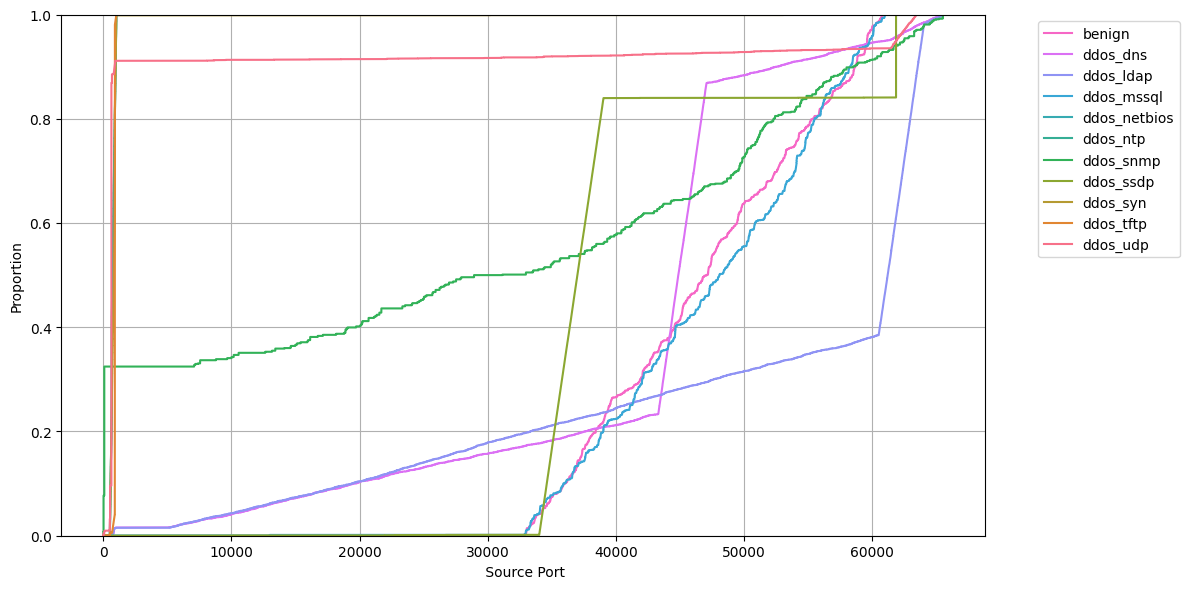

In [27]:
plt.figure(figsize=(12,6))
sns.ecdfplot(data = operational_df[operational_df['label'] != 'benign'], x = ' Source Port', hue = 'label')
plt.legend(np.unique(operational_df['label']), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

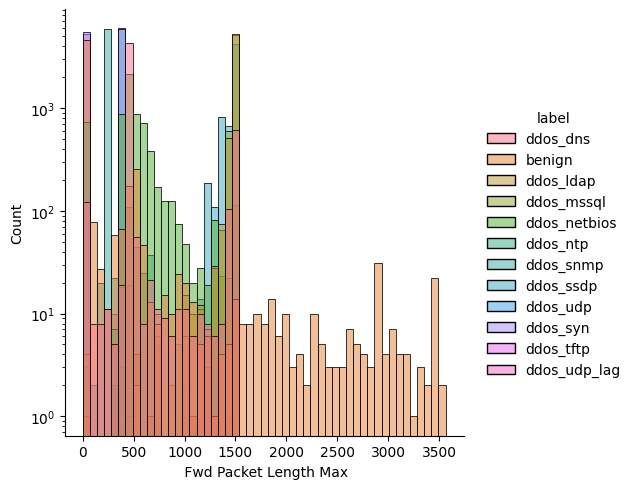

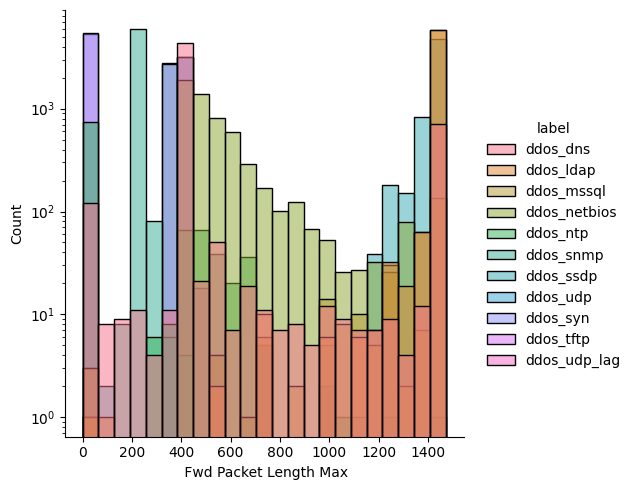

In [28]:
sns.displot(data = operational_df, x = " Fwd Packet Length Max", hue = "label")
plt.yscale('log')

sns.displot(data=operational_df[operational_df['label'] != 'benign'], x=" Fwd Packet Length Max", hue='label')
plt.yscale('log')

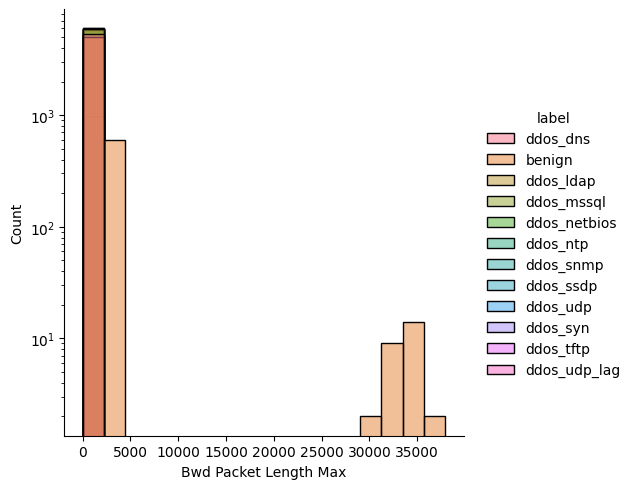

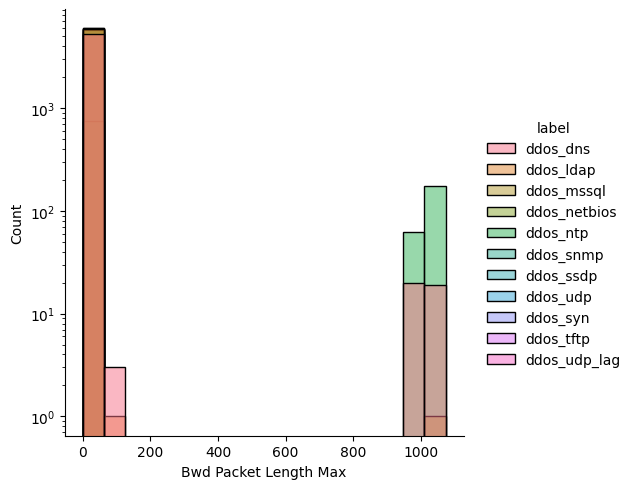

In [29]:
sns.displot(data = operational_df, x = "Bwd Packet Length Max", hue = "label")
plt.yscale('log')

sns.displot(data = operational_df[operational_df['label'] != 'benign'], x = "Bwd Packet Length Max", hue = "label")
plt.yscale('log')

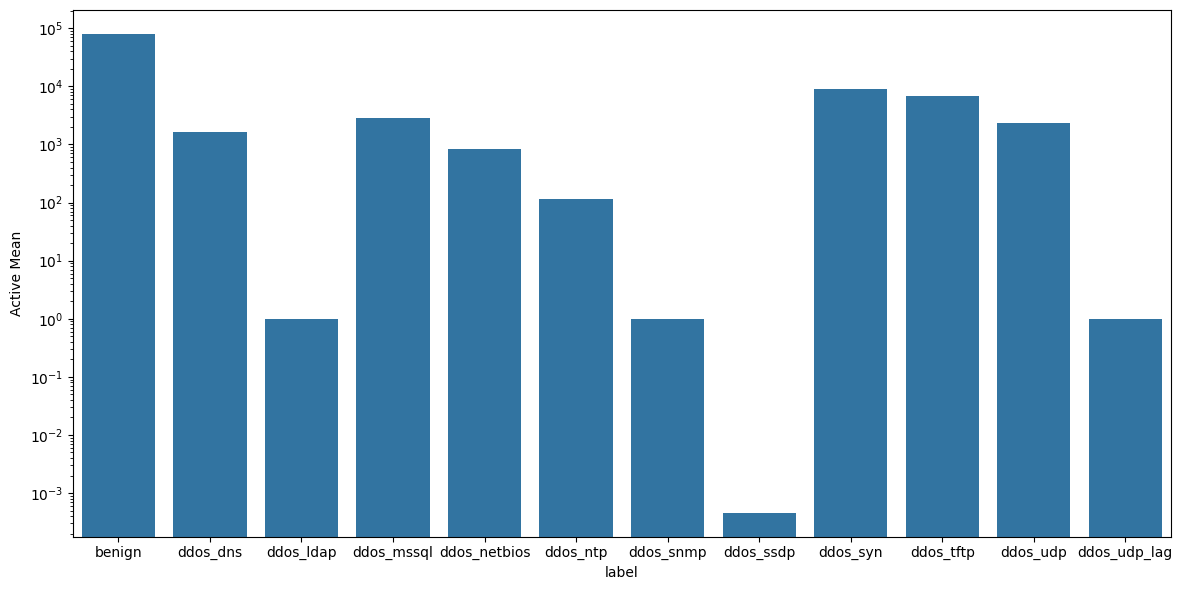

In [30]:
columns = ['Active Mean', ' Active Std', ' Active Min', ' Active Max', 'label']
summary_df = operational_df[columns]
plt.figure(figsize=(12,6))
sns.barplot(data=operational_df.groupby('label')['Active Mean'].mean().replace(0,1))
plt.yscale('log')
plt.tight_layout()

PCA with transforming non-numerical features

In [31]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)

df = df.drop(columns=['label', 'Unnamed: 0', ' Timestamp']) #dropping not useful features
df = df.drop(columns=[' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'])
# dropping 0 value features
df.head()

Flow ID     Source IP   Source Port  \
0  172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5           634   
1  172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1           634   
2  172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5           634   
3  172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5           634   
4  172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5           634   

   Destination IP   Destination Port   Protocol   Flow Duration  \
0    192.168.50.1              60495         17           28415   
1      172.16.0.5              60495         17               2   
2    192.168.50.1              46391         17           48549   
3    192.168.50.1              11894         17           48337   
4    192.168.50.1              27878         17           32026   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0                  97                        0                      42680.0   
1                   2                        0                        880.0   
2                 200                        0                      88000.0   
3                 200                        0                      88000.0   
4                 200                        0                      88000.0   

   ...  Active Mean   Active Std   Active Max   Active Min  Idle Mean  \
0  ...          0.0          0.0          0.0          0.0        0.0   
1  ...          0.0          0.0          0.0          0.0        0.0   
2  ...          0.0          0.0          0.0          0.0        0.0   
3  ...          0.0          0.0          0.0          0.0        0.0   
4  ...          0.0          0.0          0.0          0.0        0.0   

    Idle Std   Idle Max   Idle Min  SimillarHTTP   Inbound  
0        0.0        0.0        0.0             0         1  
1        0.0        0.0        0.0             0         0  
2        0.0        0.0        0.0             0         1  
3        0.0        0.0        0.0             0         1  
4        0.0        0.0        0.0             0         1  

[5 rows x 73 columns]

In [32]:
mask = df['SimillarHTTP'] == '0'
df.loc[mask,'SimillarHTTP'] = 0
mask = df['SimillarHTTP'] != '0'
df.loc[mask,'SimillarHTTP'] = 1

In [33]:
df = df[df.columns.drop(['Flow ID', ' Source IP', ' Destination IP'])]

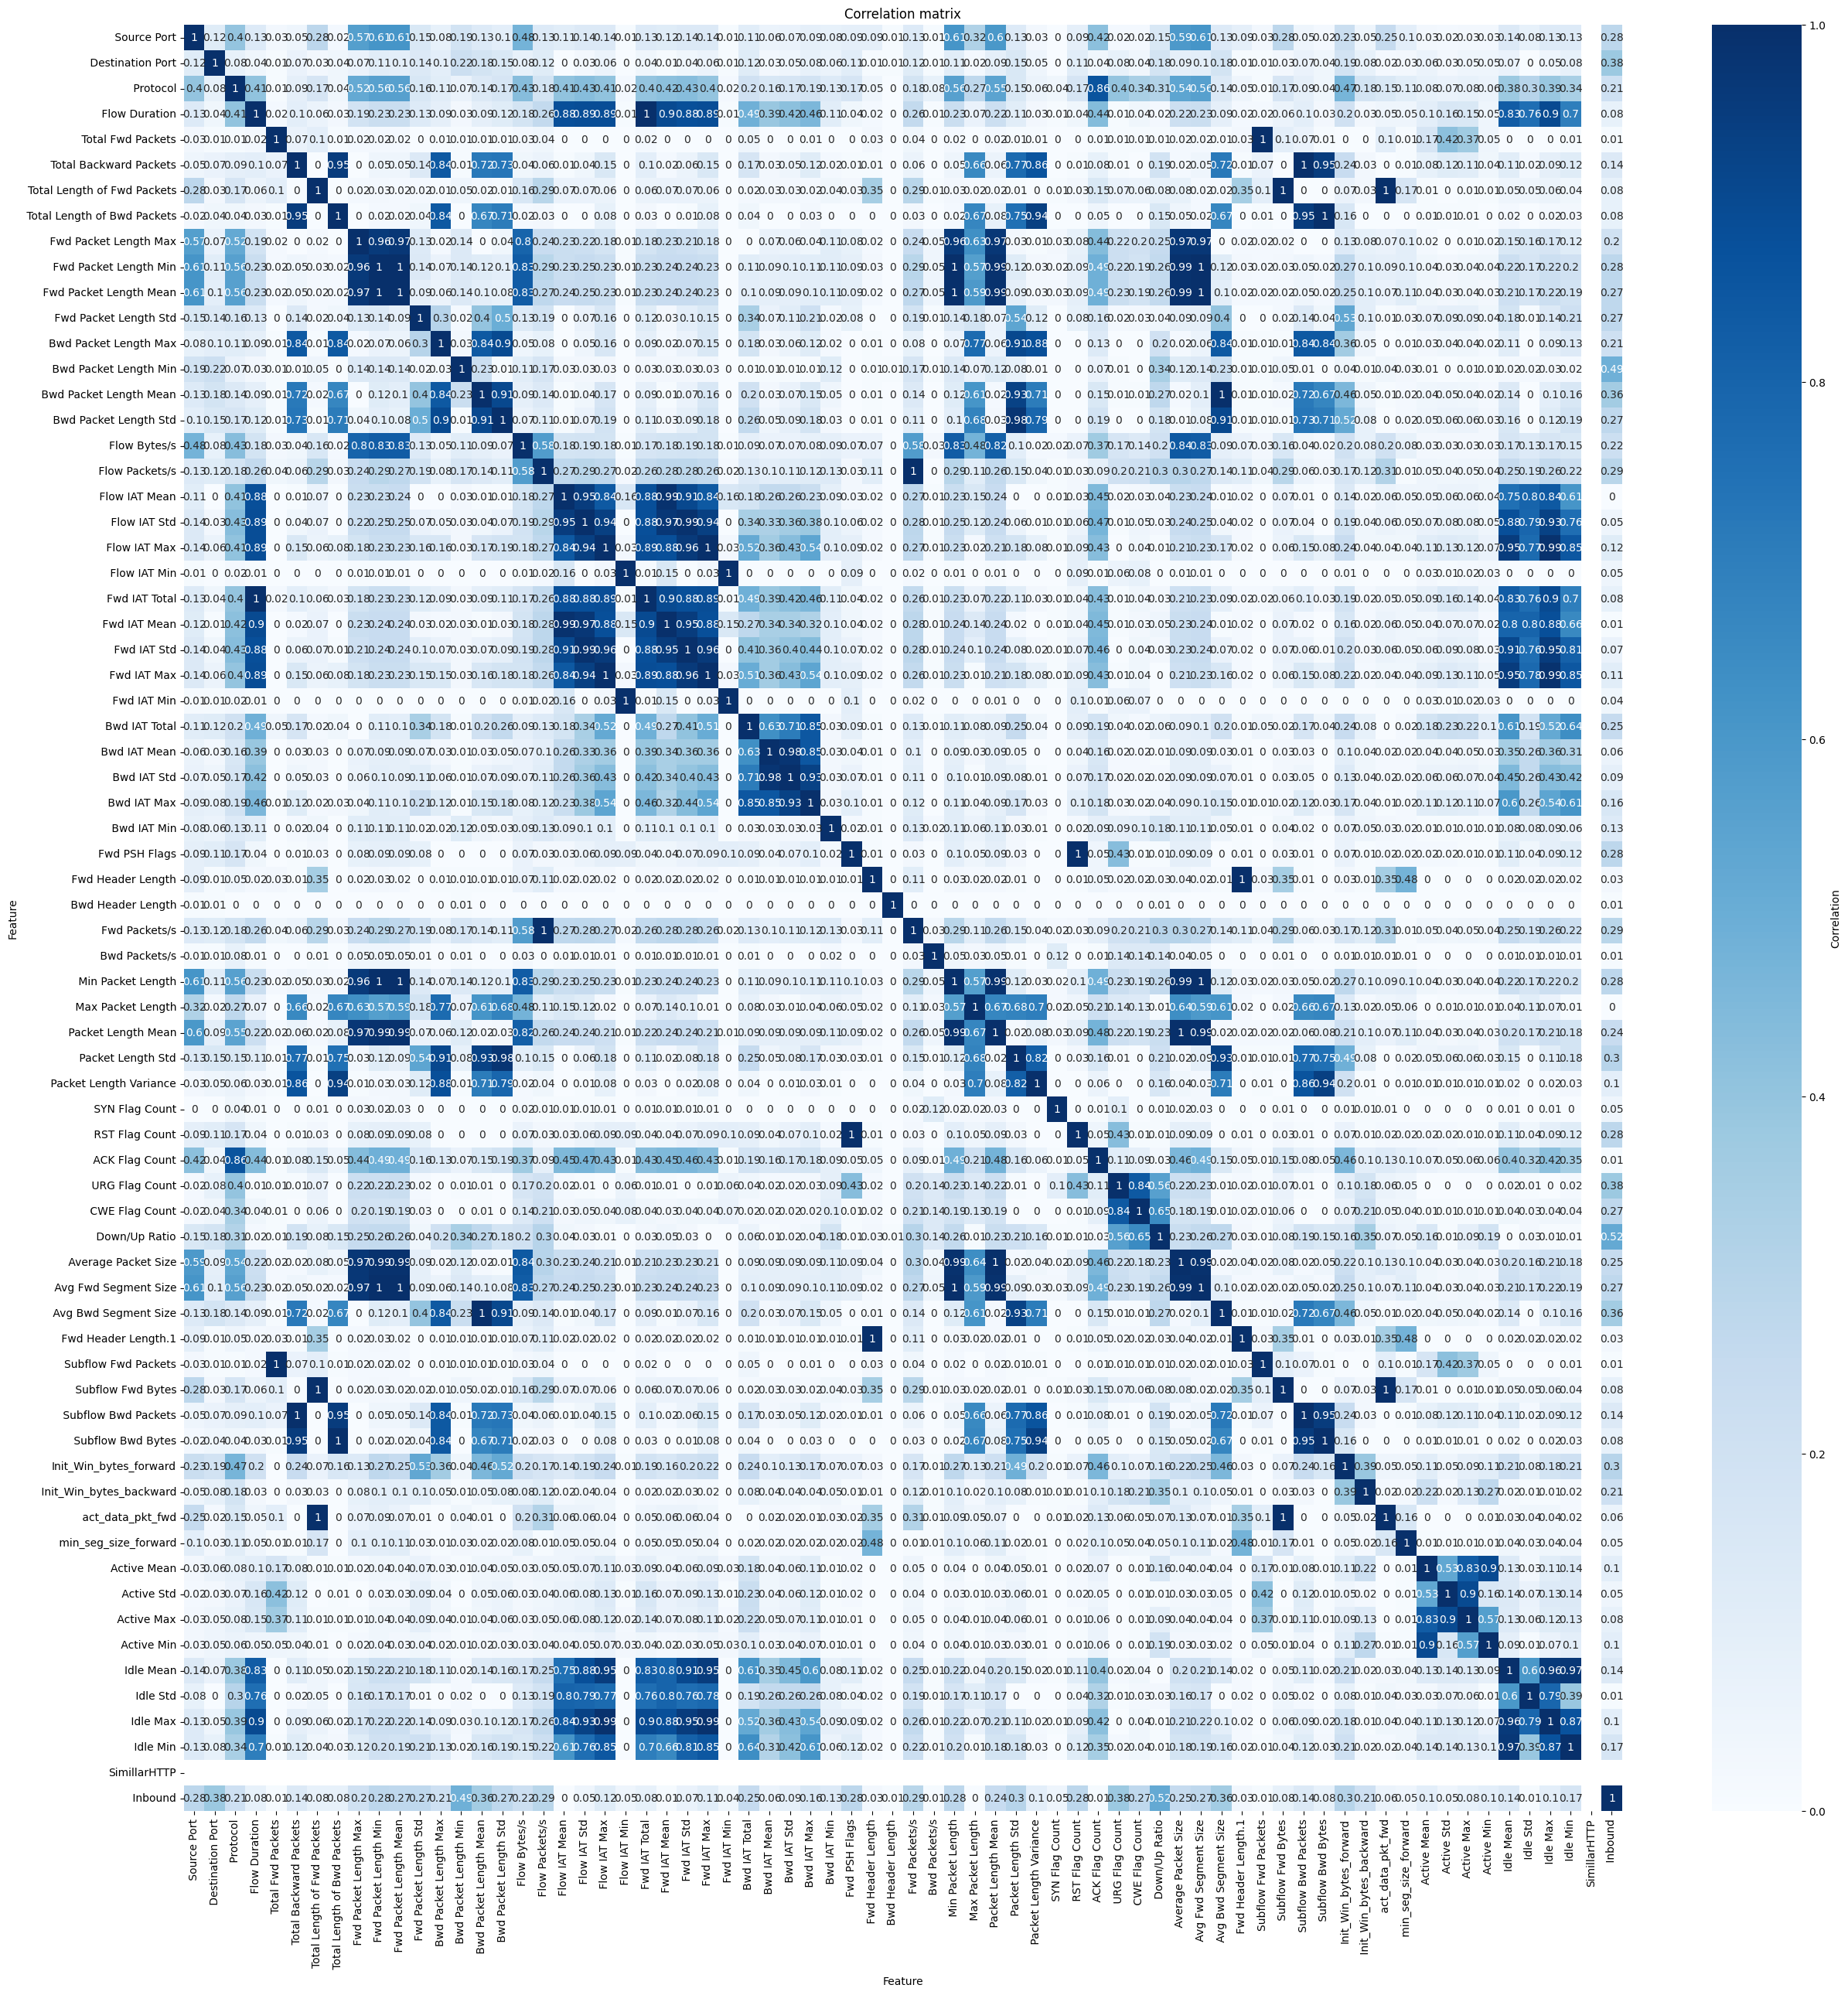

In [34]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
correlation_matrix = df.corr().abs().round(2)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, vmin=0, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

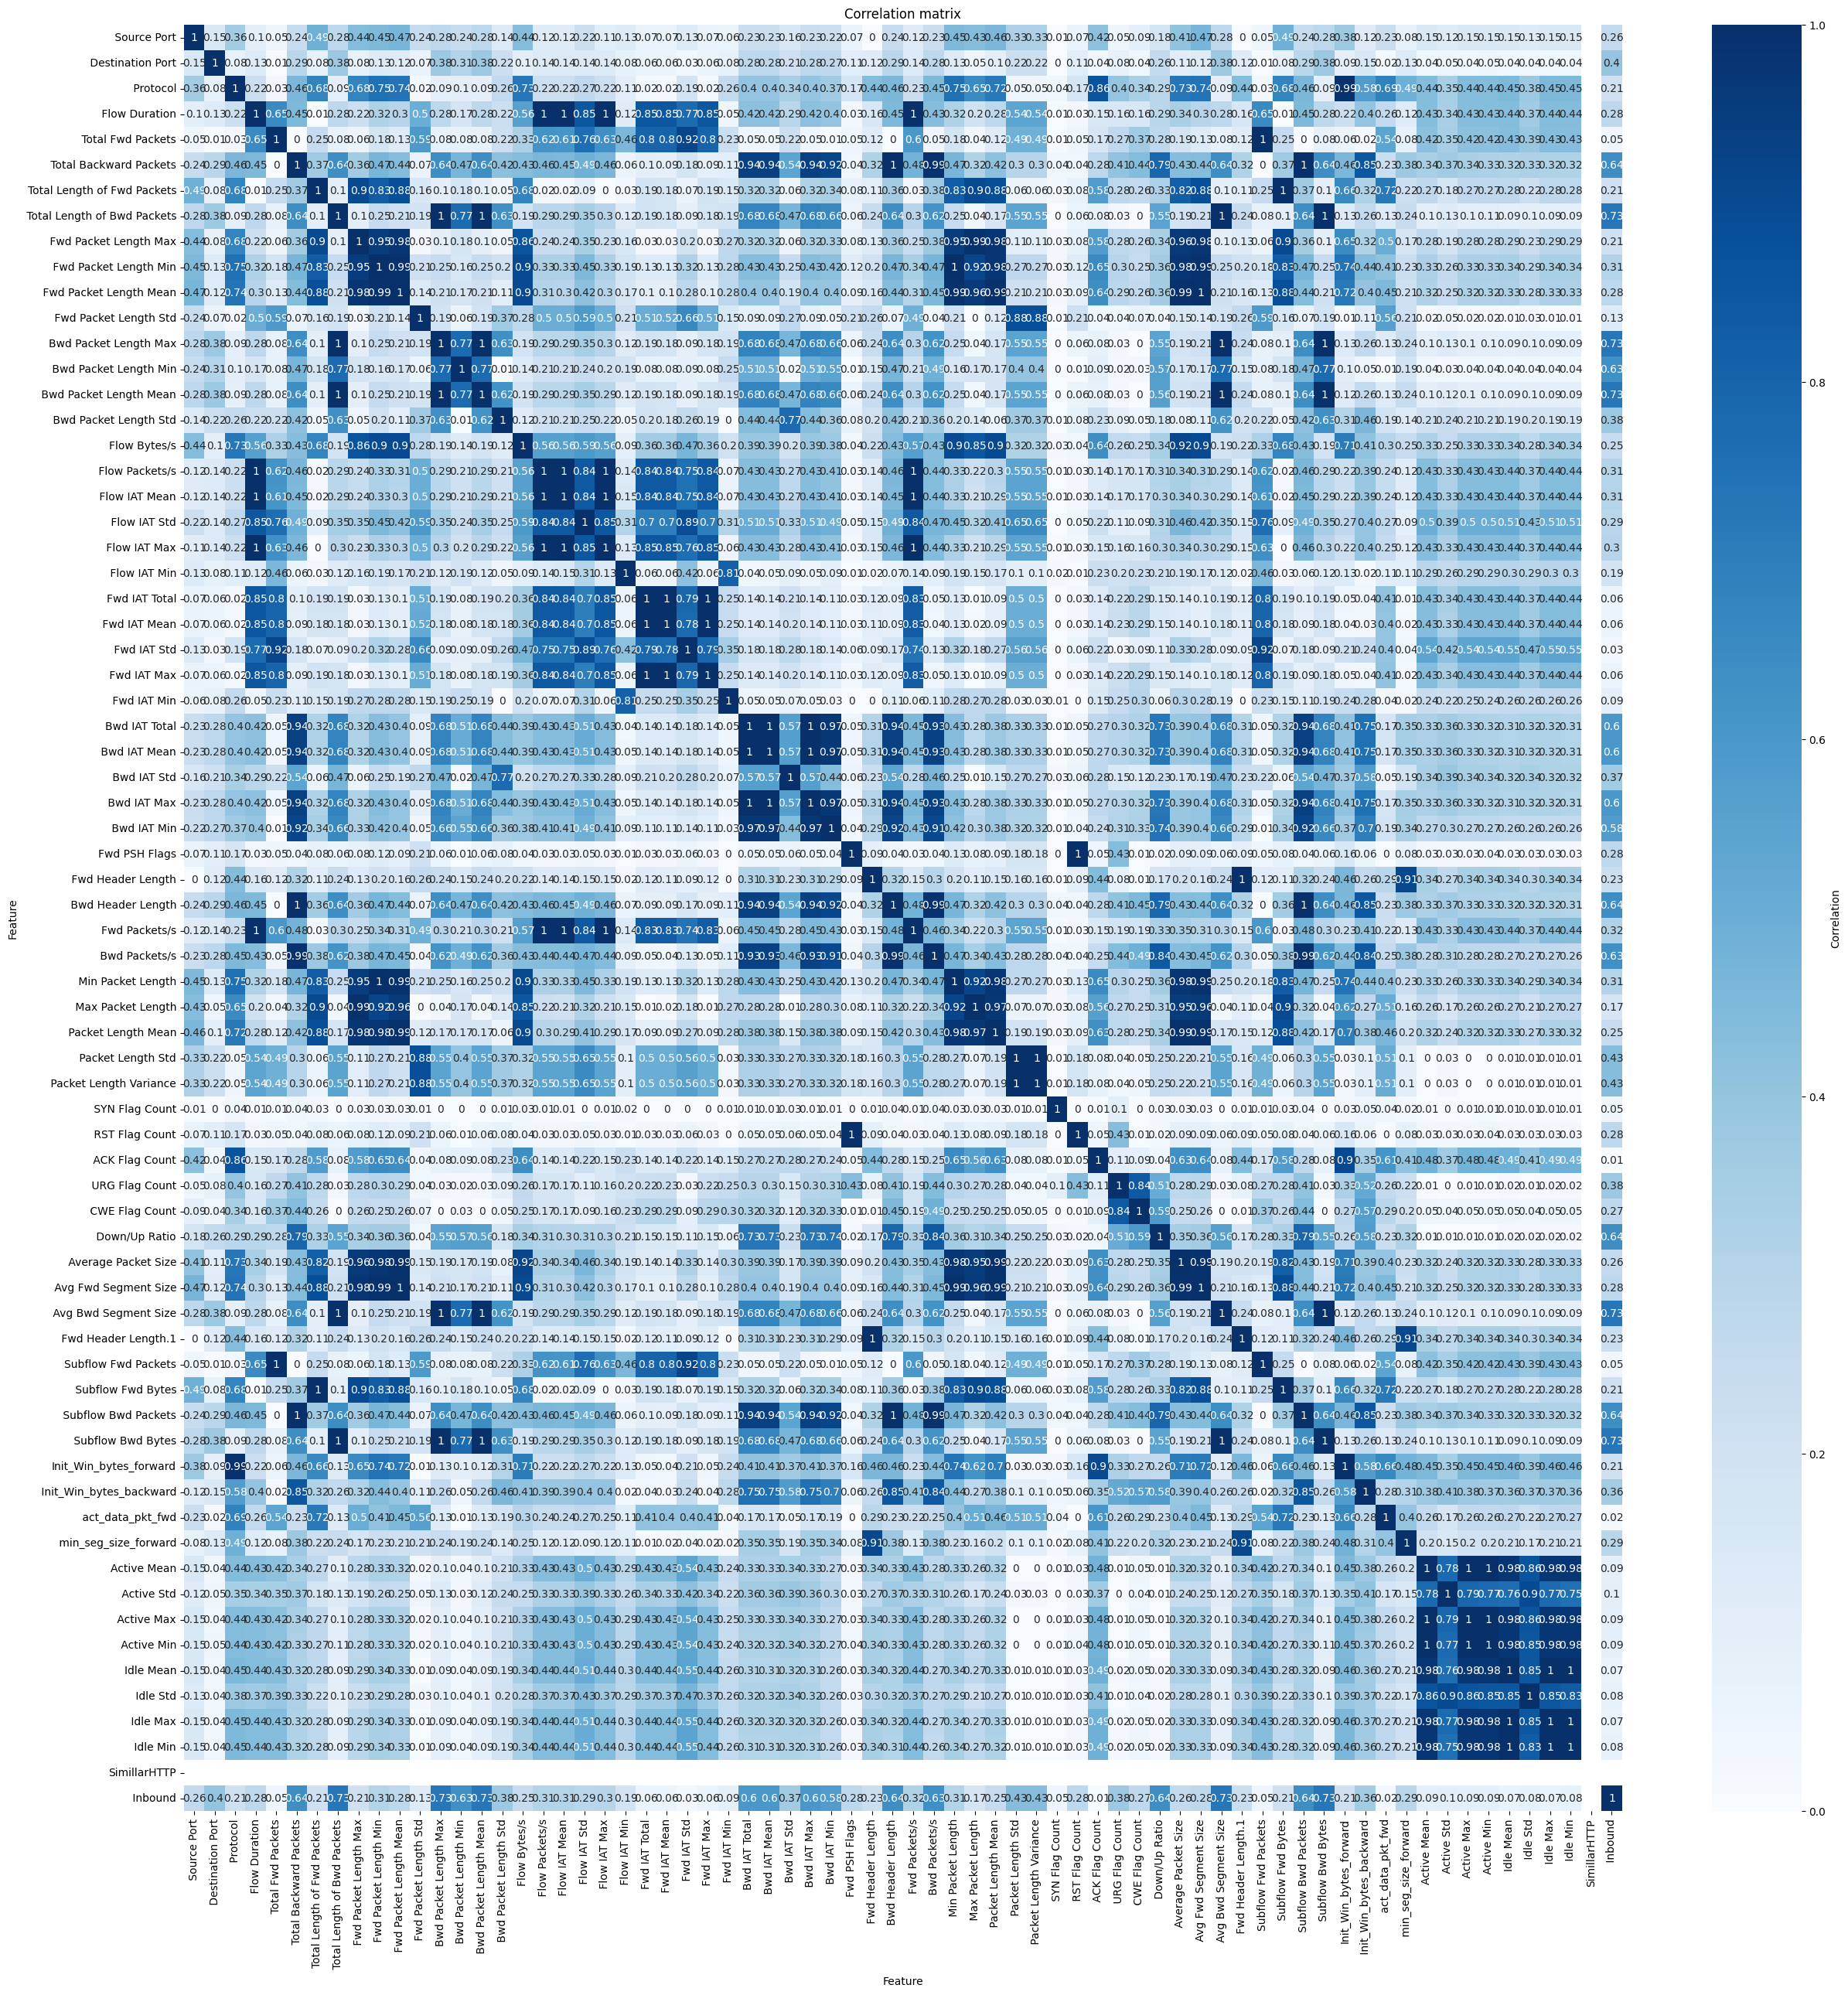

In [35]:
correlation_matrix_spearman = df.corr(method='spearman').abs().round(2)
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix_spearman, cmap='Blues', annot=True, vmin=0, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

In [36]:
df_scaled = df
df_scaled.to_csv('ddos_scaled.csv')
df_scaled.head()

Source Port   Destination Port   Protocol   Flow Duration  \
0      -0.99689           1.463534   0.560382       -0.227684   
1      -0.99689           1.463534   0.560382       -0.228947   
2      -0.99689           0.770389   0.560382       -0.226789   
3      -0.99689          -0.924976   0.560382       -0.226799   
4      -0.99689          -0.139438   0.560382       -0.227524   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0            0.169121                -0.051748                     1.754276   
1           -0.036372                -0.051748                    -0.283738   
2            0.391920                -0.051748                     3.963912   
3            0.391920                -0.051748                     3.963912   
4            0.391920                -0.051748                     3.963912   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                     -0.023697               -0.297075   
1                     -0.023697               -0.297075   
2                     -0.023697               -0.297075   
3                     -0.023697               -0.297075   
4                     -0.023697               -0.297075   

    Fwd Packet Length Min  ...  Active Mean   Active Std   Active Max  \
0               -0.254784  ...    -0.044128    -0.034259    -0.044084   
1               -0.254784  ...    -0.044128    -0.034259    -0.044084   
2               -0.254784  ...    -0.044128    -0.034259    -0.044084   
3               -0.254784  ...    -0.044128    -0.034259    -0.044084   
4               -0.254784  ...    -0.044128    -0.034259    -0.044084   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min  SimillarHTTP  \
0    -0.037205  -0.216341  -0.165955    -0.2224  -0.194882           0.0   
1    -0.037205  -0.216341  -0.165955    -0.2224  -0.194882           0.0   
2    -0.037205  -0.216341  -0.165955    -0.2224  -0.194882           0.0   
3    -0.037205  -0.216341  -0.165955    -0.2224  -0.194882           0.0   
4    -0.037205  -0.216341  -0.165955    -0.2224  -0.194882           0.0   

    Inbound  
0  0.295752  
1 -3.381206  
2  0.295752  
3  0.295752  
4  0.295752  

[5 rows x 70 columns]

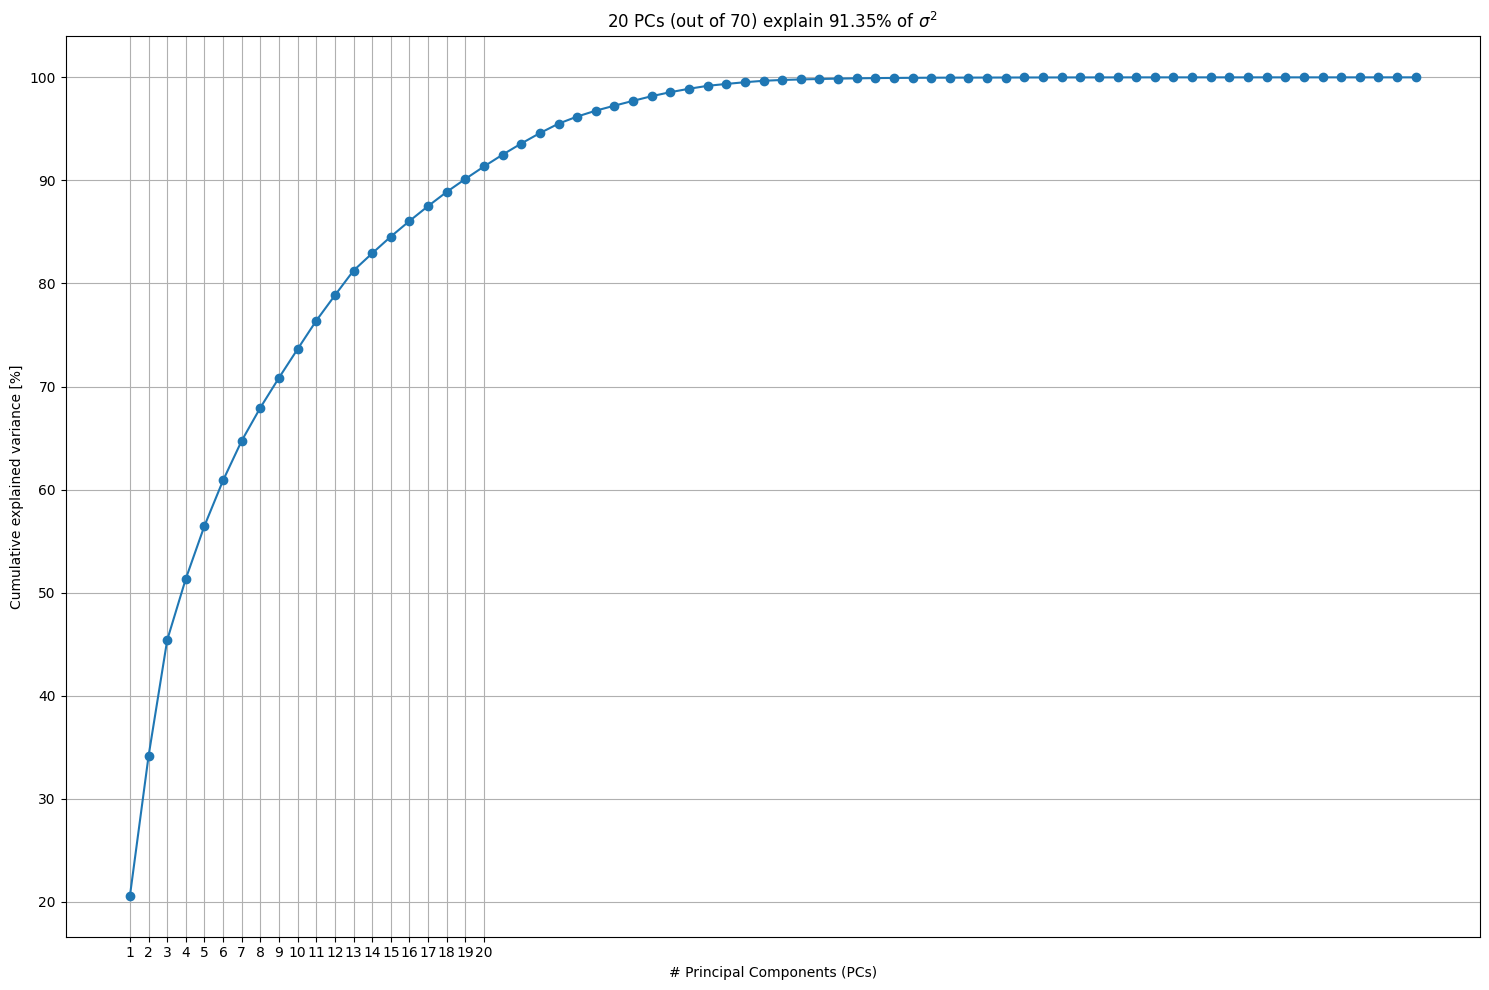

In [37]:
pca = PCA(random_state=15)
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumul_exp_var = np.cumsum(explained_variance)
perc_cumul_exp_var = cumul_exp_var*100

plt.figure(figsize=(15,10))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(20)], [i for i in range (1,21)])
plt.grid()
plt.title(f'20 PCs (out of {df_scaled.shape[1]}) explain {round(perc_cumul_exp_var[19], 2)}% of $\\sigma^2$')
plt.tight_layout()
plt.show()

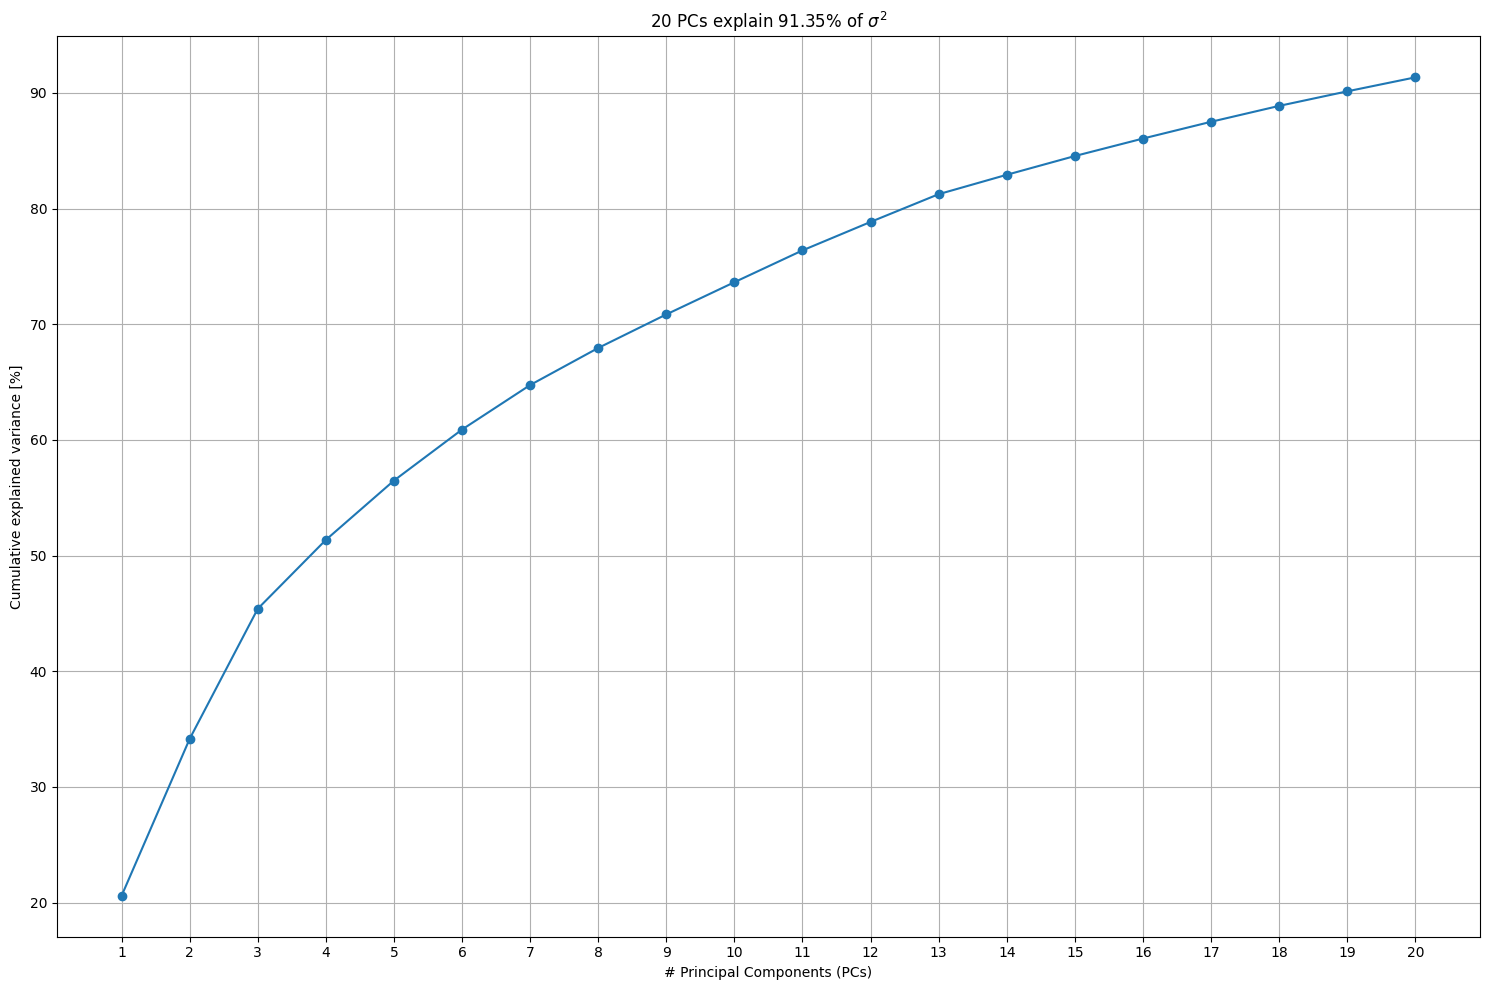

In [38]:
pca = PCA(n_components=20, random_state=15)
pca.fit(df_scaled)
pca_result = pca.transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'c{x}' for x in np.arange(1,21)])
pca_df.to_csv('pca_dataframe.csv', index=False)
explained_variance = pca.explained_variance_ratio_

# evaluate the total dataset variability while increasing the variables
cumul_exp_var = np.cumsum(explained_variance)

# percentage value to better understand the best number of components
perc_cumul_exp_var = cumul_exp_var * 100

# make the plot of cumulative explained variance wrt number of components
plt.figure(figsize=(15, 10))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(20)], [i for i in range(1,21)])
plt.grid()
plt.title(f'20 PCs explain {round(perc_cumul_exp_var[19], 2)}% of $\\sigma^2$')
plt.tight_layout()
plt.show()

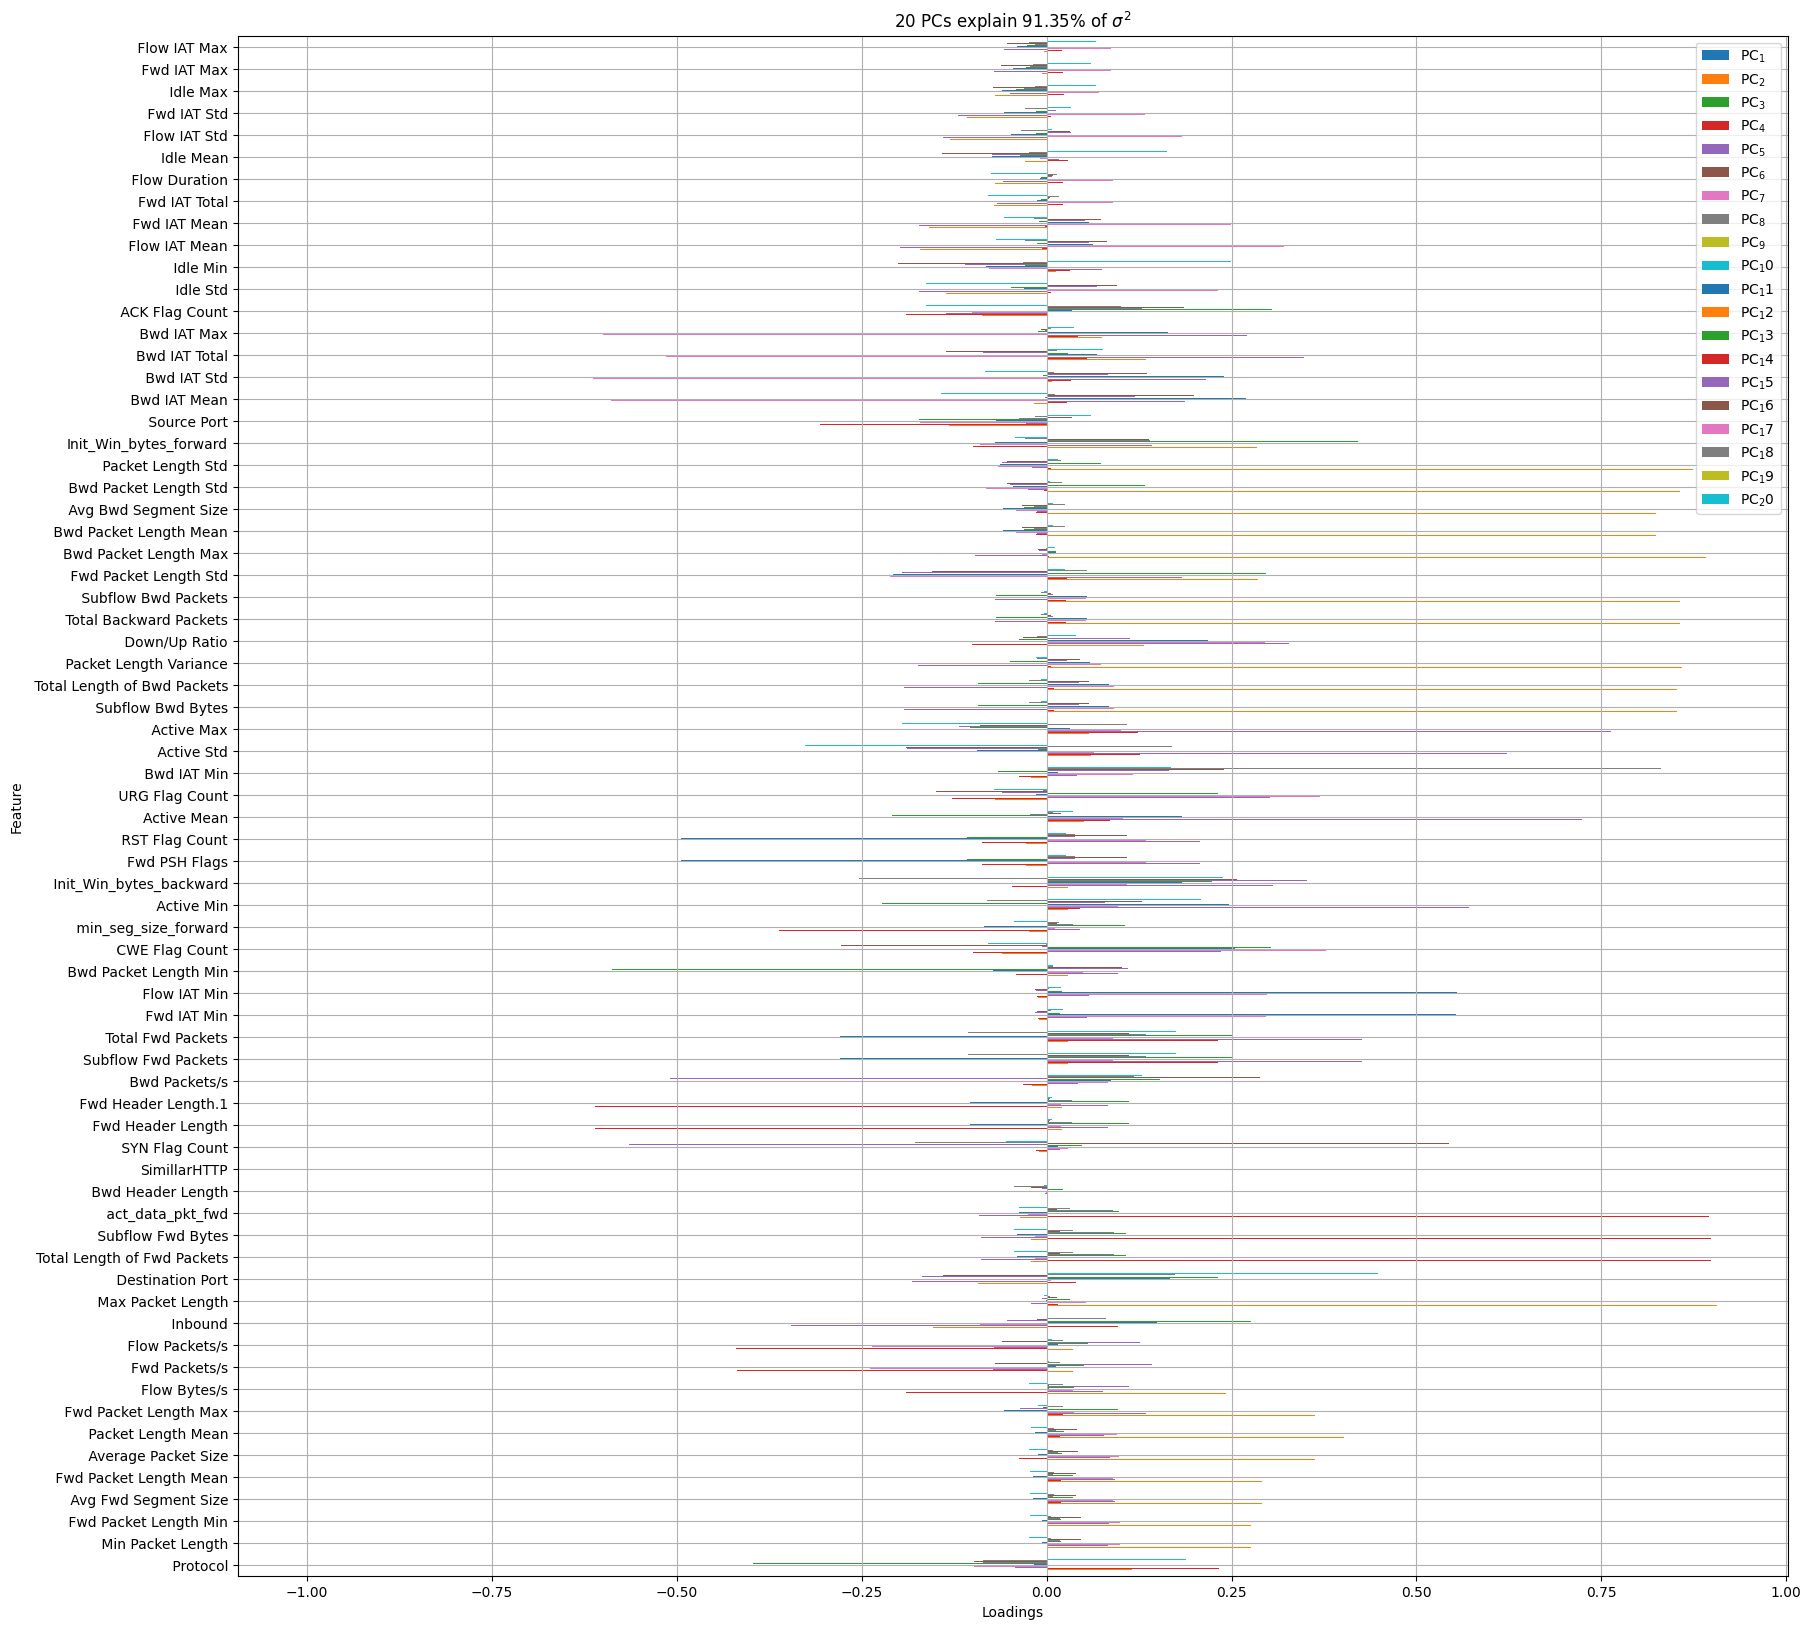

In [39]:
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, 21)],
    index = df_scaled.columns
)

plt.figure(figsize=(20,20))
loadings = loadings[[f'PC{x}' for x in np.arange(1,21)]]
loadings.sort_values([f'PC{x}' for x in np.arange(1,21)]).rename(columns={f'PC{x}':f'PC$_{x}$' for x in np.arange(1, 21)}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'20 PCs explain {round(perc_cumul_exp_var[19], 2)}% of $\\sigma^2$')
plt.show()

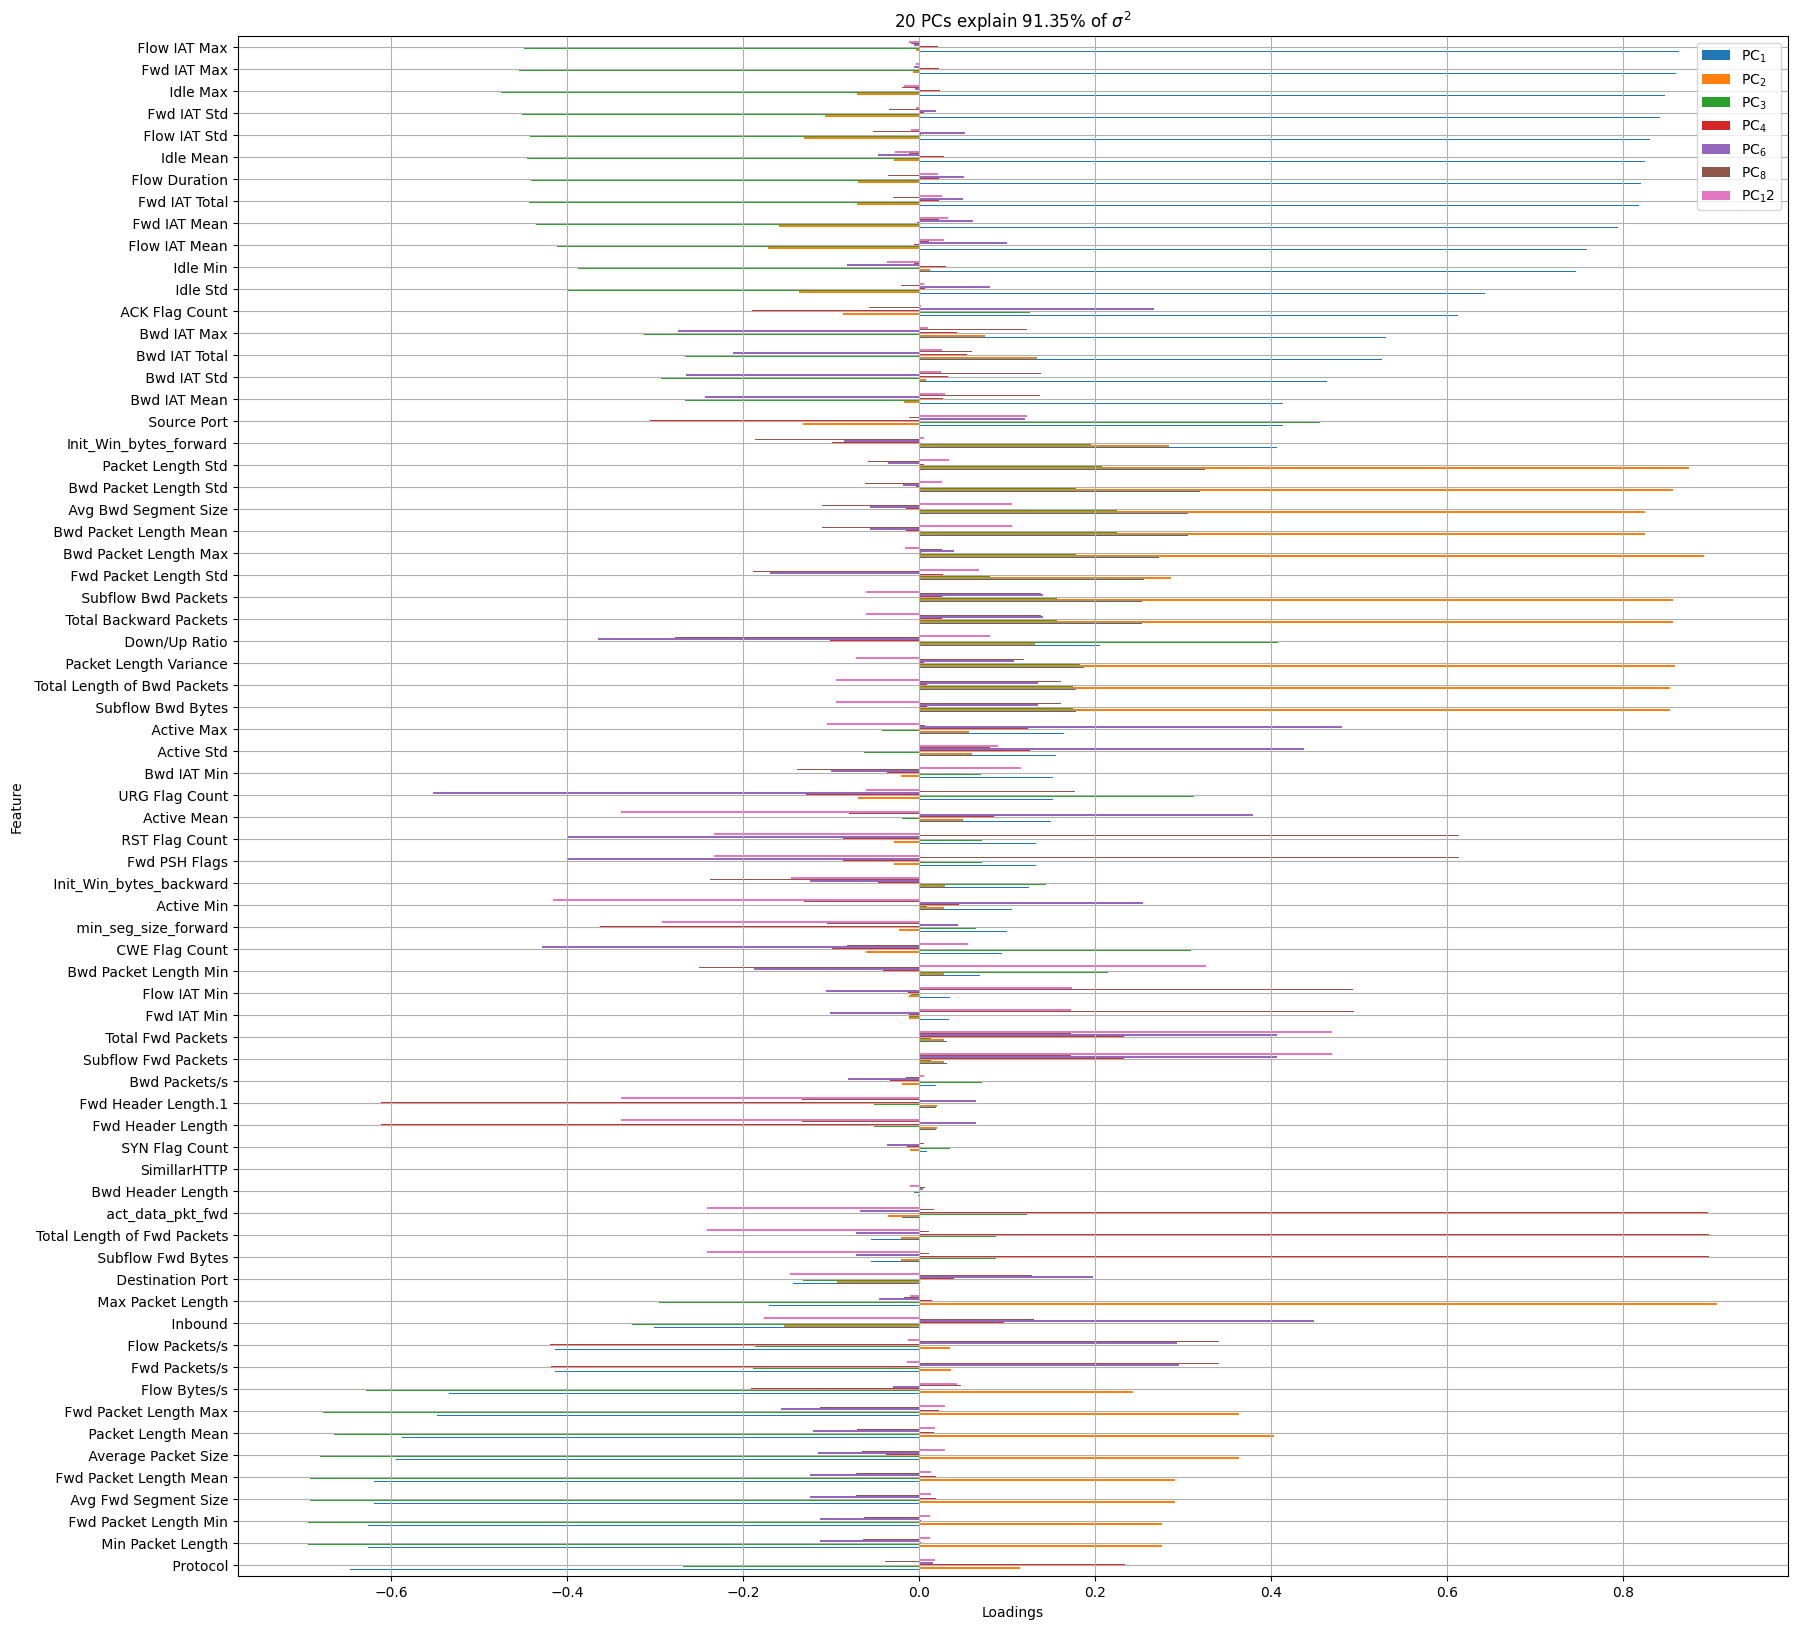

In [40]:
loadings = pd.DataFrame(
    data = pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns = [f'PC{i}' for i in range(1, 21)],
    index = df_scaled.columns
)

plt.figure(figsize=(20,20))
loadings = loadings[[f'PC{x}' for x in [1, 2, 3, 4, 6, 8, 12]]]
loadings.sort_values([f'PC{x}' for x in [1, 2, 3, 4, 6, 8, 12]]).rename(columns={f'PC{x}':f'PC$_{x}$' for x in [1, 2, 3, 4, 6, 8, 12]}).plot.barh(ax=plt.gca())
plt.grid()
plt.xlabel('Loadings')
plt.ylabel('Feature')
plt.title(f'20 PCs explain {round(perc_cumul_exp_var[19], 2)}% of $\\sigma^2$')
plt.show()

In [41]:
for col in loadings.columns:
    print(col)
    print(loadings[col].max())
    print(loadings[col].index[loadings[col].argmax()])

PC1
0.8636058204058896
 Flow IAT Max
PC2
0.9067767952609374
 Max Packet Length
PC3
0.45533177429520255
 Source Port
PC4
0.8978448411516078
Total Length of Fwd Packets
PC6
0.4804190224848363
 Active Max
PC8
0.6128122652106532
Fwd PSH Flags
PC12
0.46874242290780893
Subflow Fwd Packets


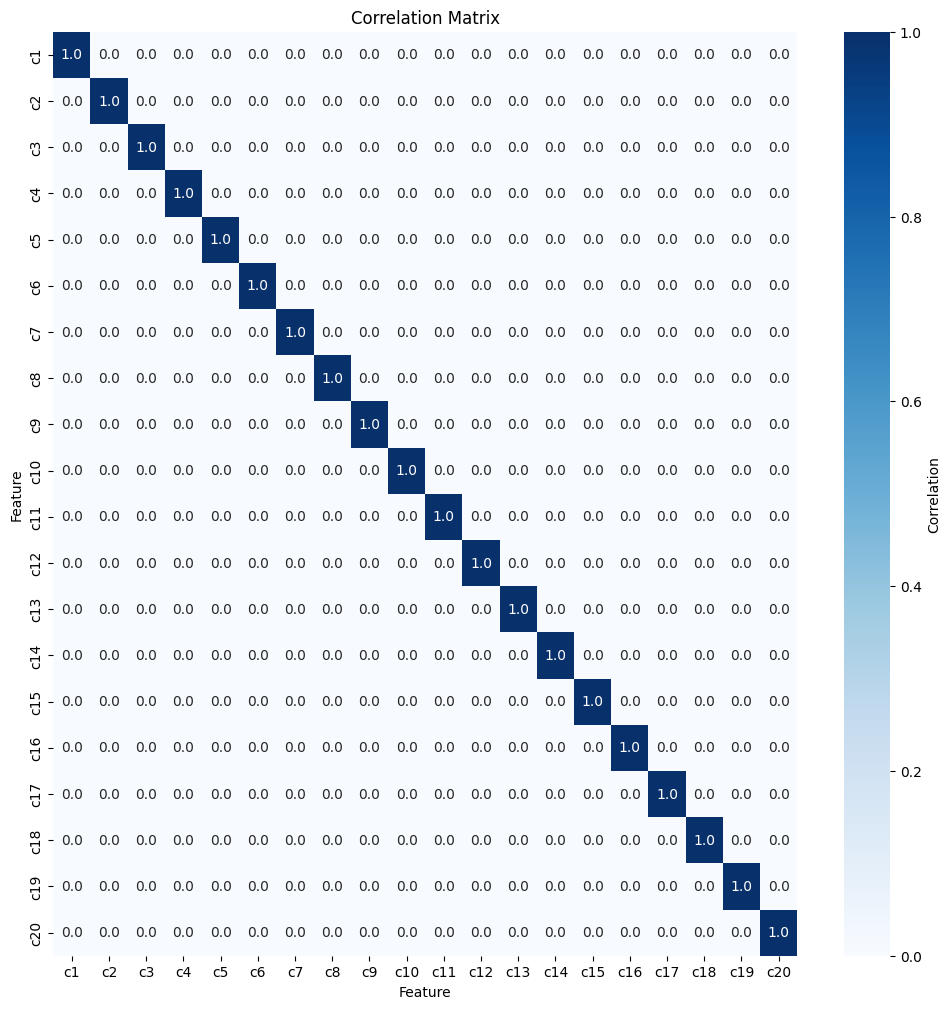

In [42]:
pca_correlation_matrix = pca_df.corr().abs()

plt.figure(figsize=(12,12))
sns.heatmap(pca_correlation_matrix, cmap='Blues', annot=True, vmin=0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.1f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation Matrix')
plt.show()

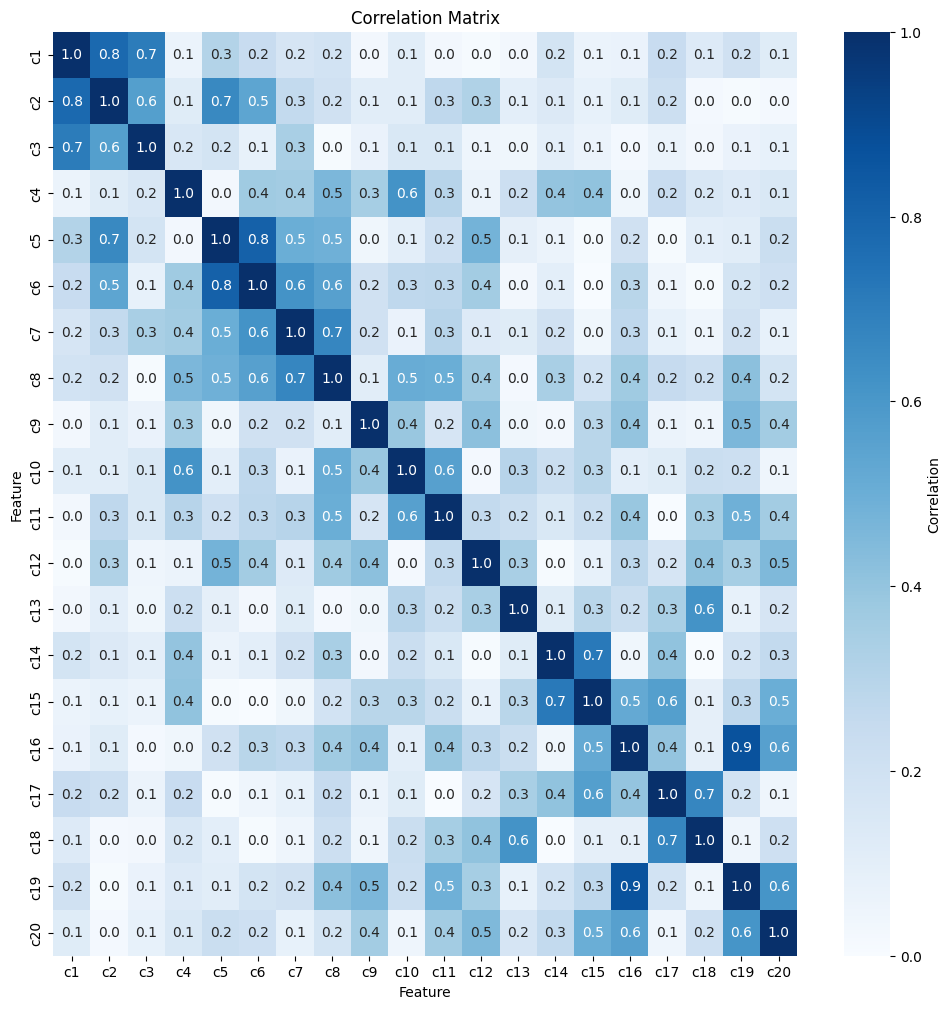

In [43]:
correlation_matrix_spearman = pca_df.corr(method='spearman').abs().round(2)

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix_spearman, cmap='Blues', annot=True, vmin=0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.1f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation Matrix')
plt.show()